# **STINTSY Machine Project**

## Section 1. Introduction

Each group should select one real-world dataset from the list of datasets provided for the project. Each dataset is accompanied with a description file, which also contains detailed description of each feature.

The target task (i.e., classification or regression) should be properly stated as well.

This project utilizes the **Labor Force Survey (LFS), April 2016**, a nationwide household survey conducted quarterly to collect data on demographic and socio-economic characteristics of the population. The dataset provided statistics on levels and trends of employment, unemployment and underemployment of the country as a whole.

The objective of this study is to develop a **classification model** that predicts an individual's employment status based on various socio-economic and demographic factors. The target variable, **New Employment Criteria**, categorizes individuals into three groups: Employed, Unemployed, and Not in the Labor Force. Several features, including age, sex, education level, occupation, and work history, are considered to determine their relationship with employment status.

To achieve this, we explore multiple machine learning models—**Logistic Regression (Multinomial)**, **Neural Networks**, and **Naïve Bayes**—to classify individuals based on their employment status. By evaluating the performance of these models, we aim to identify the most effective approach for employment prediction, which could aid in labor policy formulation and workforce development initiatives.

## Section 2. Description of the dataset

In this section of the notebook, you must fulfill the following:

- State a brief description of the dataset.
- Provide a description of the collection process executed to build the dataset. Discuss the implications of the data collection method on the generated conclusions and insights. Note that you may need to look at relevant sources related to the dataset to acquire necessary information for this part of the project.
- Describe the structure of the dataset file.
- What does each row and column represent?
- How many instances are there in the dataset?
- How many features are there in the dataset?
- If the dataset is composed of different files that you will combine in the succeeding steps, describe the structure and the contents of each file.
- Discuss the features in each dataset file. What does each feature represent? All features, even those which are not used for the study, should be described to the reader. The purpose of each feature in the dataset should be clear to the reader of the notebook without having to go through an external link.


### Brief Description of the Dataset

The dataset originates from the Labor Force Survey (LFS) conducted by the Philippine Statistics Authority (PSA) in April 2016. The LFS is a nationwide household survey conducted quarterly to gather data on the demographic and socio-economic characteristics of the population. Its primary objective is to estimate employment, unemployment, and underemployment levels in the country. 

### Data Collection Process

The dataset was collected through a sample survey method. The survey involved 42,768 sample households (or 42,576 households excluding Batanes) selected to provide precise and reliable labor force estimates at the national and regional levels. The data collection focused on private households, excluding institutional populations.

Supervision of the data collection process was rigorous, involving Regional Directors (RDs), Provincial Statistics Officers (PSOs), and field supervisors. The process included:

1. Observation of interviews to ensure data quality.

2. Review of accomplished questionnaires for completeness and consistency.

3. Discussions with interviewers to correct errors and refine data collection techniques.

The supervisors conducted spot-checks, re-interviews, and field verifications to ensure the accuracy of the reported information. Findings and errors were documented and submitted to the central office for further validation. This methodology ensured the reliability of employment and labor market statistics derived from the survey.

### Structure of the Dataset

In the dataset, each row represents an individual respondent (a person aged 15 years and over), and each column corresponds to a specific  feature of the respondent. 

- Number of Instances (Rows): 180862

- Number of Features (Columns): 50

## Section 3. List of requirements

List all the Python libraries and modules that you used.

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

## Section 4. Data preprocessing and cleaning

Perform necessary steps before using the data. In this section of the notebook, please take note of the following:
- If needed, perform preprocessing techniques to transform the data to the appropriate representation. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering, among others. There should be a correct and proper justification for the use of each preprocessing technique used in the project.
- Make sure that the data is clean, especially features that are used in the project. This may include checking for misrepresentations, checking the data type, dealing with missing data, dealing with duplicate data, and dealing with outliers, among others. There should be a correct and proper justification for the application (or non-application) of each data cleaning method used in the project. Clean only the variables utilized in the study.


### Loading the dataset

In [2]:
df = pd.read_csv("LFS PUF April 2016.csv") 

In [3]:
display(df)

,PUFREG,PUFPRV,PUFPRRCD,PUFHHNUM,PUFURB2K10,PUFPWGTFIN,PUFSVYMO,PUFSVYYR,PUFPSU,PUFRPL,...,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFC43_QKB,PUFNEWEMPSTAT
0,1,28,2800,1,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
1,1,28,2800,1,2,388.8280,4,2016,217,1,...,,,,,,,,1,01,1
2,1,28,2800,1,2,406.1194,4,2016,217,1,...,,,,,,,,1,01,1
3,1,28,2800,2,2,405.2219,4,2016,217,1,...,,,,,,,,1,01,1
4,1,28,2800,2,2,384.3556,4,2016,217,1,...,,,,,,,,1,96,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,17,59,5900,40880,2,239.4341,4,2016,258,1,...,,,,,,,,1,50,1
180858,17,59,5900,40880,2,189.8885,4,2016,258,1,...,,8,,,,2,,,,3
180859,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,
180860,17,59,5900,40880,2,207.7395,4,2016,258,1,...,,,,,,,,,,


### Dropping Unwanted Columns

In [4]:
features = [
    "PUFC04_SEX", "PUFC05_AGE", "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC09_GRADTECH", 
    "PUFC11_WORK", "PUFC12_JOB", "PUFC14_PROCC", "PUFC17_NATEM", "PUFC18_PNWHRS", 
    "PUFC19_PHOURS", "PUFC23_PCLASS", "PUFC25_PBASIC", "PUFC30_LOOKW", "PUFC32_JOBSM", 
    "PUFC33_WEEKS", "PUFC34_WYNOT", "PUFC35_LTLOOKW", "PUFC36_AVAIL", "PUFC37_WILLING", 
    "PUFC38_PREVJOB", "PUFC40_POCC", "PUFC41_WQTR", "PUFNEWEMPSTAT"
]

df = df[features]

### Initial Exploration

In [5]:
display(df)

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC12_JOB,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,...,PUFC32_JOBSM,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFNEWEMPSTAT
0,1,49,2,350,2,1,,61,1,08,...,,,,,,,,,1,1
1,2,61,2,350,2,1,,92,2,04,...,,,,,,,,,1,1
2,1,19,1,350,2,1,,92,2,08,...,,,,,,,,,1,1
3,1,48,2,320,2,1,,61,1,04,...,,,,,,,,,1,1
4,2,41,2,350,2,1,,91,1,12,...,,,,,,,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180857,1,29,2,350,2,1,,13,1,08,...,,,,,,,,,1,1
180858,2,29,2,830,2,2,2,,,,...,,,8,,,,2,,,3
180859,2,4,,,,,,,,,...,,,,,,,,,,
180860,2,2,,,,,,,,,...,,,,,,,,,,


### Total Number

In [6]:
print("Total number of instances:", len(df))

Total number of instances: 180862


### Check Duplicate Rows

In [7]:
print("Total number of duplicates:", df.duplicated().sum())

Total number of duplicates: 86345


### Check Size Before Dropping Duplicate Rows

In [8]:
print("Size Before:", df.shape)

Size Before: (180862, 24)


### Dropping Duplicate Rows

In [9]:
df.drop_duplicates(inplace=True)

### Check Size After Dropping Duplicate Rows

In [10]:
print("Size After:", df.shape)

Size After: (94517, 24)


### Check Missing Values

In [11]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

df.head()

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC12_JOB,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,...,PUFC32_JOBSM,PUFC33_WEEKS,PUFC34_WYNOT,PUFC35_LTLOOKW,PUFC36_AVAIL,PUFC37_WILLING,PUFC38_PREVJOB,PUFC40_POCC,PUFC41_WQTR,PUFNEWEMPSTAT
0,1,49,2,350,2,1,NaN,61,1,08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,2,61,2,350,2,1,NaN,92,2,04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,1,19,1,350,2,1,NaN,92,2,08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,1,48,2,320,2,1,NaN,61,1,04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,2,41,2,350,2,1,NaN,91,1,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [12]:
print(df.isnull().sum())

PUFC04_SEX             0
PUFC05_AGE             0
PUFC06_MSTAT          10
PUFC07_GRADE          10
PUFC09_GRADTECH      516
PUFC11_WORK         1770
PUFC12_JOB         69455
PUFC14_PROCC       25755
PUFC17_NATEM       26099
PUFC18_PNWHRS      26099
PUFC19_PHOURS      26099
PUFC23_PCLASS      26099
PUFC25_PBASIC      58731
PUFC30_LOOKW       70694
PUFC32_JOBSM       92256
PUFC33_WEEKS       92256
PUFC34_WYNOT       72955
PUFC35_LTLOOKW     92990
PUFC36_AVAIL       88701
PUFC37_WILLING     88701
PUFC38_PREVJOB     70694
PUFC40_POCC        75432
PUFC41_WQTR         7014
PUFNEWEMPSTAT       2276
dtype: int64


Since some features have more than 50-60% of missing values, we can just drop these columns instead of trying to fill in missing values

### Dropping Columns with a Lot of Missing Features

In [13]:
features = [
    "PUFC04_SEX", "PUFC05_AGE", "PUFC06_MSTAT", "PUFC07_GRADE", "PUFC09_GRADTECH", 
    "PUFC11_WORK", "PUFC14_PROCC", "PUFC17_NATEM", "PUFC18_PNWHRS", 
    "PUFC19_PHOURS", "PUFC23_PCLASS", 
    "PUFC41_WQTR", "PUFNEWEMPSTAT"
]

df = df[features]

display(df)

print("Size After:", df.shape)

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC23_PCLASS,PUFC41_WQTR,PUFNEWEMPSTAT
0,1,49,2,350,2,1,61,1,08,024,3,1,1
1,2,61,2,350,2,1,92,2,04,008,6,1,1
2,1,19,1,350,2,1,92,2,08,024,1,1,1
3,1,48,2,320,2,1,61,1,04,020,3,1,1
4,2,41,2,350,2,1,91,1,12,072,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180850,1,34,2,000,2,1,62,1,05,030,3,1,1
180851,2,32,2,000,2,1,61,1,04,028,3,1,1
180857,1,29,2,350,2,1,13,1,08,040,4,1,1
180858,2,29,2,830,2,2,NaN,NaN,NaN,NaN,NaN,NaN,3


Size After: (94517, 13)


### Check Data Types

In [14]:
print(df.dtypes)

PUFC04_SEX          int64
PUFC05_AGE          int64
PUFC06_MSTAT       object
PUFC07_GRADE       object
PUFC09_GRADTECH    object
PUFC11_WORK        object
PUFC14_PROCC       object
PUFC17_NATEM       object
PUFC18_PNWHRS      object
PUFC19_PHOURS      object
PUFC23_PCLASS      object
PUFC41_WQTR        object
PUFNEWEMPSTAT      object
dtype: object


### Filling Missing Values / Cleaning

Exploring each feature

**PUFC04_SEX** - Sex

In [15]:
print(df['PUFC04_SEX'].isna().sum())
df['PUFC04_SEX'].unique() 

0


array([1, 2])

In the dataset, the code "1" represents Male, and "2" represents Female. We'll use the map function to replace these codes with their corresponding gender labels for better readability.

In [16]:
df['PUFC04_SEX'] = df['PUFC04_SEX'].map({1: 'Male', 2: 'Female'})   

**PUFC05_AGE** - Age

In [17]:
print(df['PUFC05_AGE'].isna().sum())

df['PUFC05_AGE'].unique() 

0


array([49, 61, 19, 48, 41, 20, 15, 59, 11,  2, 51, 26, 23, 71, 54, 27, 46,
       18,  5, 80, 43, 38, 73, 35, 72, 74, 39, 16, 14, 13,  8, 22,  3, 50,
       44, 34, 40,  9, 17, 53, 45, 10,  7, 77, 81, 37, 25,  6, 52, 55, 68,
       56, 30, 95, 70, 32, 65, 62, 36, 92, 33, 28, 24, 21, 29,  1, 89, 31,
        0, 57, 12, 47, 42, 63, 86,  4, 60, 76, 79, 88, 58, 64, 69, 66, 75,
       78, 67, 85, 84, 87, 82, 83, 91, 93, 90, 96, 94, 97, 98, 99])

Since the study focuses on participants aged 15 and over, we remove records of individuals younger than 15 to ensure the dataset aligns with the target population.

In [18]:
df = df[df['PUFC05_AGE'] >= 15]
df['PUFC05_AGE'].unique() 

array([49, 61, 19, 48, 41, 20, 15, 59, 51, 26, 23, 71, 54, 27, 46, 18, 80,
       43, 38, 73, 35, 72, 74, 39, 16, 22, 50, 44, 34, 40, 17, 53, 45, 77,
       81, 37, 25, 52, 55, 68, 56, 30, 95, 70, 32, 65, 62, 36, 92, 33, 28,
       24, 21, 29, 89, 31, 57, 47, 42, 63, 86, 60, 76, 79, 88, 58, 64, 69,
       66, 75, 78, 67, 85, 84, 87, 82, 83, 91, 93, 90, 96, 94, 97, 98, 99])

In [19]:
print("Size After:", df.shape)

Size After: (94001, 13)


**PUFC06_MSTAT** - Marital Status

In [20]:
print(df['PUFC06_MSTAT'].isna().sum())
df['PUFC06_MSTAT'].unique()

0


array(['2', '1', '3', '4', '6', '5'], dtype=object)

The dataset contains marital status codes stored as strings (e.g., "1"-"6"). To fix this, we replace the codes with their corresponding labels.

In [21]:
df['PUFC06_MSTAT'] = df['PUFC06_MSTAT'].map({'1': 'Single', '2': 'Married/Living Together', '3': 'Widowed', '4': 'Divorced/Separated', '5': 'Annulled', '6': 'Unknown'})

**PUFC07_GRADE** - Highest Grade Completed

In [22]:
df['PUFC07_GRADE'].unique() 

array(['350', '320', '622', '672', '240', '220', '614', '330', '280',
       '632', '900', '820', '589', '572', '250', '830', '810', '634',
       '230', '686', '581', '681', '552', '534', '840', '658', '000',
       '548', '310', '648', '210', '652', '662', '601', '642', '562',
       '685', '631', '684', '340', '584', '621', '410', '010', '260',
       '420', '664', '676', '521', '638', '554', '646', '689', '522',
       '654', '644', '532', '531', '514', '558', '501', '586', '542',
       '576', '544', '585', '564'], dtype=object)

In this, we will replace all known grade codes with their corresponding descriptions and set unknown values as "Unknown".

In [23]:
df['PUFC07_GRADE'] = df['PUFC07_GRADE'].map({
    '000': 'No grade completed',
    '010': 'Preschool',
    '210': 'Grade 1',
    '220': 'Grade 2',
    '230': 'Grade 3',
    '240': 'Grade 4',
    '250': 'Grade 5',
    '260': 'Grade 6',
    '280': 'Elementary Graduate',
    '310': 'High School - First Year',
    '320': 'High School - Second Year',
    '330': 'High School - Third Year',
    '350': 'High School Graduate',
    '410': 'Post Secondary - First Year',
    '420': 'Post Secondary - Second Year',
    '810': 'College - First Year',
    '820': 'College - Second Year',
    '830': 'College - Third Year',
    '840': 'College - Fourth Year',
    '900': 'Post Baccalaureate'
}).fillna('Unknown')


**PUFC09_GRADTECH** - Graduate of technical/vocational course

In [24]:
df['PUFC09_GRADTECH'].unique()

array(['2', '1'], dtype=object)

In the dataset, code "1" (Yes) represents if the member is currently attending school, and code "2" (No) if not.

In [25]:
df['PUFC09_GRADTECH'] = df['PUFC09_GRADTECH'].map({'1': 'Yes', '2': 'No'})

df = df.fillna({'PUFC09_GRADTECH': "Unknown"})

**PUFC11_WORK** - Work Indicator

In [26]:
print(df['PUFC11_WORK'].isna().sum())
df['PUFC11_WORK'].unique()

1760


array(['1', '2', nan], dtype=object)

There are missing values in the column so we will just get the mode value and use that to fill up the NA spots

In [27]:
df = df.assign(PUFC11_WORK=df['PUFC11_WORK'].map({'1': 'Yes', '2': 'No'}))

df = df.fillna({'PUFC11_WORK': "Unknown"})

In [28]:
print(df['PUFC11_WORK'].isna().sum())

0


There are now 0 missing values in the column

**PUFC14_PROCC** - Primary Occupation


In [29]:
print(df['PUFC14_PROCC'].isna().sum())
df['PUFC14_PROCC'].unique()

25583


array(['61', '92', '91', '52', nan, '53', '13', '54', '93', '12', '71',
       '11', '83', '14', '51', '33', '44', '75', '42', '34', '96', '22',
       '62', '23', '72', '26', '41', '21', '43', '24', '74', '31', '82',
       '35', '94', '73', '25', '32', '81', '95', '02', '01', '03', '63'],
      dtype=object)

In [30]:
df['PUFC14_PROCC'] = df['PUFC14_PROCC'].replace("  ", np.nan)
df['PUFC14_PROCC'] = pd.to_numeric(df['PUFC14_PROCC'], errors='coerce')
print(df['PUFC14_PROCC'].dtype) 

float64


In [31]:
occupation_map = {
    11: "Chief executives, senior officials and legislators",
    12: "Administrative and commercial managers",
    13: "Production and specialized services managers",
    14: "Hospitality, retail and other services managers",
    21: "Science and engineering professionals",
    22: "Health professionals",
    23: "Teaching professionals",
    24: "Business and administration professionals",
    25: "Information and communication technology professionals",
    26: "Legal, social and cultural professionals",
    31: "Science and engineering associate professionals",
    32: "Health associate professionals",
    33: "Business and administration associate professionals",
    34: "Legal, social, cultural and related professionals",
    35: "Information and communications technician",
    41: "General and keyboard clerks",
    42: "Customer service clerks",
    43: "Numerical and material recording clerks",
    44: "Other clerical support workers",
    51: "Personal service workers",
    52: "Sales workers",
    53: "Personal care workers",
    54: "Protective services workers",
    61: "Market-oriented skilled agricultural workers",
    62: "Market-oriented skilled forestry, fishery and hunting workers",
    63: "Subsistence farmers, fishers, hunters and gatherers",
    71: "Building and related trades workers, excluding electricians",
    72: "Metal, machinery and related trades workers",
    73: "Handicraft and printing workers",
    74: "Electrical and electronics trades workers",
    75: "Food processing, wood working, garment and other craft and related trades workers",
    81: "Stationary plant and machine operators",
    82: "Assemblers",
    83: "Drivers and mobile plant operators",
    91: "Cleaners and helpers",
    92: "Agricultural, forestry and fishery laborers",
    93: "Laborers in mining, construction, manufacturing and transport",
    94: "Food preparation assistants",
    95: "Street and related sales and service workers",
    96: "Refuse workers and other elementary workers",
    1: "Commissioned armed forces officers",
    2: "Non-commissioned armed forces officers",
    3: "Armed forces occupations, other ranks"
}
df['PUFC14_PROCC'] = df['PUFC14_PROCC'].map(occupation_map)


df = df.fillna({'PUFC14_PROCC': "Unknown"})



**PUFC17_NATEM** - Nature of Employment

In [32]:
print(df['PUFC17_NATEM'].isna().sum())
df['PUFC17_NATEM'].unique()

25583


array(['1', '2', nan, '3'], dtype=object)

There are missing values in the column so we will just get the mode value and use that to fill up the NA spots

In [33]:
df = df.assign(PUFC17_NATEM=df['PUFC17_NATEM'].map({'1': 'Permanent Job', '2' : 'Short-term', '3': 'Different Employer'}))


df = df.fillna({'PUFC17_NATEM': "Unknown"})



**PUFC18_PNWHRS** – Normal Working Hours per Day

In [34]:
print(df['PUFC18_PNWHRS'].isna().sum())
df['PUFC18_PNWHRS'].unique()

25583


array(['08', '04', '12', nan, '10', '02', '03', '06', '09', '07', '05',
       '01', '13', '15', '14', '11', '16'], dtype=object)

In [35]:
df['PUFC18_PNWHRS'] = pd.to_numeric(df['PUFC18_PNWHRS'], errors='coerce')# convert to int 
df['PUFC18_PNWHRS'] = df['PUFC18_PNWHRS'].fillna(0).astype(int) 
print(df['PUFC18_PNWHRS'].dtype) 
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df['PUFC18_PNWHRS'].unique()


int64


array([ 8,  4, 12,  0, 10,  2,  3,  6,  9,  7,  5,  1, 13, 15, 14, 11, 16])

**PUFC19_PHOURS** – Total Number of Hours Worked during the past week

In [36]:
print(df['PUFC19_PHOURS'].isna().sum())
df['PUFC19_PHOURS'].unique()

25583


array(['024', '008', '020', '072', '048', nan, '010', '060', '016', '040',
       '070', '004', '032', '045', '030', '015', '003', '002', '042',
       '063', '054', '036', '007', '028', '006', '014', '012', '018',
       '056', '025', '000', '091', '035', '021', '009', '084', '090',
       '050', '005', '049', '066', '044', '077', '057', '098', '105',
       '052', '064', '065', '059', '027', '055', '112', '022', '038',
       '096', '078', '033', '001', '089', '058', '075', '071', '053',
       '062', '039', '031', '011', '034', '043', '026', '103', '094',
       '047', '108', '041', '046', '013', '080', '100', '017', '092',
       '029', '102', '082', '088', '076', '093', '051', '019', '074',
       '068', '061', '067', '069', '073', '101', '086', '023', '037',
       '081', '079', '085'], dtype=object)

In [37]:
df['PUFC19_PHOURS'] = pd.to_numeric(df['PUFC19_PHOURS'], errors='coerce') # convert to int 
df['PUFC19_PHOURS'] = df['PUFC19_PHOURS'].fillna(0).astype(int)
print(df['PUFC19_PHOURS'].dtype) 

df['PUFC19_PHOURS'].unique()

int64


array([ 24,   8,  20,  72,  48,   0,  10,  60,  16,  40,  70,   4,  32,
        45,  30,  15,   3,   2,  42,  63,  54,  36,   7,  28,   6,  14,
        12,  18,  56,  25,  91,  35,  21,   9,  84,  90,  50,   5,  49,
        66,  44,  77,  57,  98, 105,  52,  64,  65,  59,  27,  55, 112,
        22,  38,  96,  78,  33,   1,  89,  58,  75,  71,  53,  62,  39,
        31,  11,  34,  43,  26, 103,  94,  47, 108,  41,  46,  13,  80,
       100,  17,  92,  29, 102,  82,  88,  76,  93,  51,  19,  74,  68,
        61,  67,  69,  73, 101,  86,  23,  37,  81,  79,  85])

**PUFC23_PCLASS** – Class of Worker

In [38]:
print(df['PUFC23_PCLASS'].isna().sum())
df['PUFC23_PCLASS'].unique()

25583


array(['3', '6', '1', '0', nan, '2', '4', '5'], dtype=object)

In [39]:
df = df.assign(PUFC23_PCLASS=df['PUFC23_PCLASS'].map({'0': 'Private Household', '1' : 'Private Establishment', '2': 'Govt/Govt Corporation', '3' : 'Self Employed', '4' : 'Employer', '5' : 'With Pay (Family Owned Business)', '6' : 'Without Pay (Family owned Business)', '9' : 'Not Reported' }))


df = df.fillna({'PUFC23_PCLASS': 'Unknown'})


In [40]:
print(df['PUFC23_PCLASS'].isna().sum())

0


**PUFC41_WQTR** – Did work or had a job during the past quarter

In [41]:
print(df['PUFC41_WQTR'].isna().sum())
df['PUFC41_WQTR'].unique()

6498


array(['1', nan, '2'], dtype=object)

In [42]:
df = df.assign(PUFC41_WQTR=df['PUFC41_WQTR'].map({'1' : 'Yes', '2' : 'No'}))

df = df.fillna({'PUFC41_WQTR': "Unknown"})


**PUFNEWEMPSTAT** – New Employment Criteria


In [43]:
print(df['PUFNEWEMPSTAT'].isna().sum())
df['PUFNEWEMPSTAT'].unique()

1760


array(['1', '3', '2', nan], dtype=object)

In [44]:
df = df.assign(PUFNEWEMPSTAT=df['PUFNEWEMPSTAT'].map({'1' : 'Employed', '2' : 'Unemployed', '3' : 'Not in the Labor Force'}))

df = df.fillna({'PUFNEWEMPSTAT': "Unknown"})

### Checking for Missing Values


In [45]:
print(df.isnull().sum())

PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC09_GRADTECH    0
PUFC11_WORK        0
PUFC14_PROCC       0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC23_PCLASS      0
PUFC41_WQTR        0
PUFNEWEMPSTAT      0
dtype: int64


### Display the Cleansed Version of the Dataset

In [46]:
display(df)

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC23_PCLASS,PUFC41_WQTR,PUFNEWEMPSTAT
0,Male,49,Married/Living Together,High School Graduate,No,Yes,Market-oriented skilled agricultural workers,Permanent Job,8,24,Self Employed,Yes,Employed
1,Female,61,Married/Living Together,High School Graduate,No,Yes,"Agricultural, forestry and fishery laborers",Short-term,4,8,Without Pay (Family owned Business),Yes,Employed
2,Male,19,Single,High School Graduate,No,Yes,"Agricultural, forestry and fishery laborers",Short-term,8,24,Private Establishment,Yes,Employed
3,Male,48,Married/Living Together,High School - Second Year,No,Yes,Market-oriented skilled agricultural workers,Permanent Job,4,20,Self Employed,Yes,Employed
4,Female,41,Married/Living Together,High School Graduate,No,Yes,Cleaners and helpers,Permanent Job,12,72,Private Household,Yes,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180850,Male,34,Married/Living Together,No grade completed,No,Yes,"Market-oriented skilled forestry, fishery and ...",Permanent Job,5,30,Self Employed,Yes,Employed
180851,Female,32,Married/Living Together,No grade completed,No,Yes,Market-oriented skilled agricultural workers,Permanent Job,4,28,Self Employed,Yes,Employed
180857,Male,29,Married/Living Together,High School Graduate,No,Yes,Production and specialized services managers,Permanent Job,8,40,Employer,Yes,Employed
180858,Female,29,Married/Living Together,College - Third Year,No,No,Unknown,Unknown,0,0,Unknown,Unknown,Not in the Labor Force


In [47]:
df.dtypes

PUFC04_SEX         object
PUFC05_AGE          int64
PUFC06_MSTAT       object
PUFC07_GRADE       object
PUFC09_GRADTECH    object
PUFC11_WORK        object
PUFC14_PROCC       object
PUFC17_NATEM       object
PUFC18_PNWHRS       int64
PUFC19_PHOURS       int64
PUFC23_PCLASS      object
PUFC41_WQTR        object
PUFNEWEMPSTAT      object
dtype: object

### Saving Clenased Data

In [48]:
df.to_csv("cleaned_data.csv", index=False)

## Section 5. Exploratory Data Analysis

Import Required Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv("cleaned_data.csv") 

display(df)

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC23_PCLASS,PUFC41_WQTR,PUFNEWEMPSTAT
0,Male,49,Married/Living Together,High School Graduate,No,Yes,Market-oriented skilled agricultural workers,Permanent Job,8,24,Self Employed,Yes,Employed
1,Female,61,Married/Living Together,High School Graduate,No,Yes,"Agricultural, forestry and fishery laborers",Short-term,4,8,Without Pay (Family owned Business),Yes,Employed
2,Male,19,Single,High School Graduate,No,Yes,"Agricultural, forestry and fishery laborers",Short-term,8,24,Private Establishment,Yes,Employed
3,Male,48,Married/Living Together,High School - Second Year,No,Yes,Market-oriented skilled agricultural workers,Permanent Job,4,20,Self Employed,Yes,Employed
4,Female,41,Married/Living Together,High School Graduate,No,Yes,Cleaners and helpers,Permanent Job,12,72,Private Household,Yes,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93996,Male,34,Married/Living Together,No grade completed,No,Yes,"Market-oriented skilled forestry, fishery and ...",Permanent Job,5,30,Self Employed,Yes,Employed
93997,Female,32,Married/Living Together,No grade completed,No,Yes,Market-oriented skilled agricultural workers,Permanent Job,4,28,Self Employed,Yes,Employed
93998,Male,29,Married/Living Together,High School Graduate,No,Yes,Production and specialized services managers,Permanent Job,8,40,Employer,Yes,Employed
93999,Female,29,Married/Living Together,College - Third Year,No,No,Unknown,Unknown,0,0,Unknown,Unknown,Not in the Labor Force


### Univariate Analysis

**PUFC04_SEX** - Sex

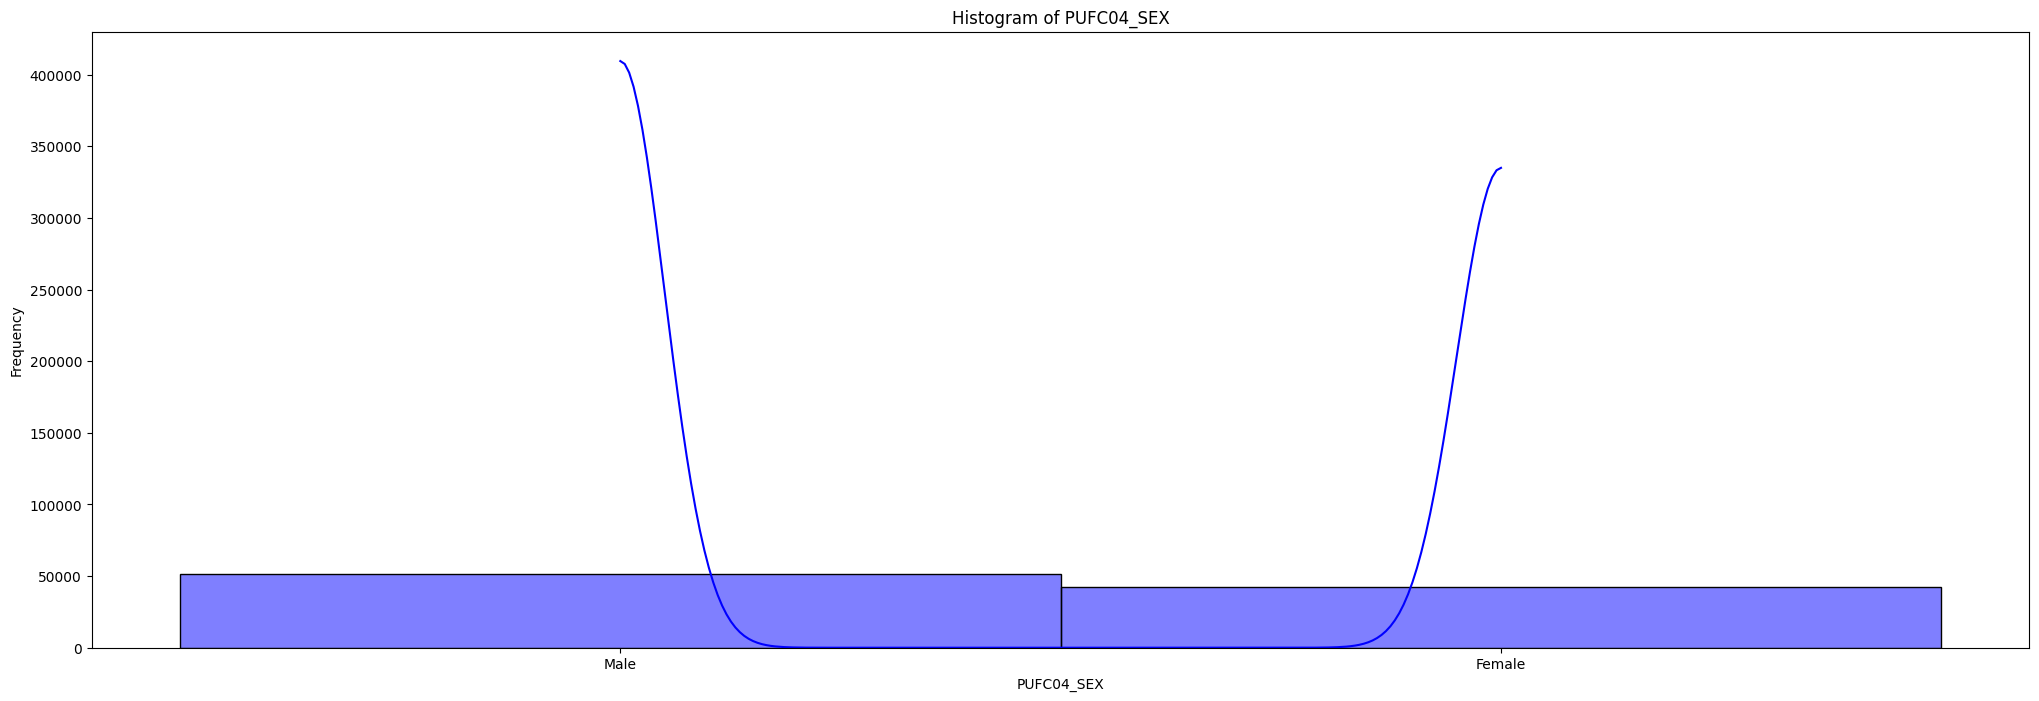

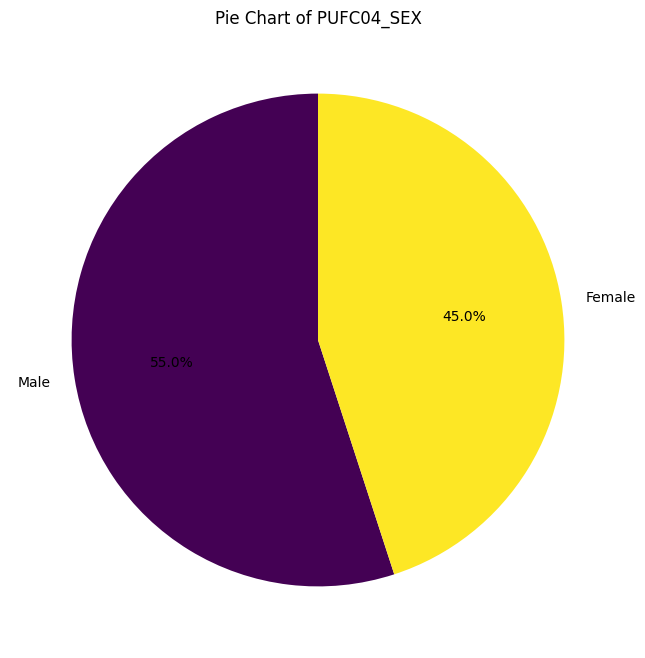

In [50]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC04_SEX"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC04_SEX") 
plt.xlabel("PUFC04_SEX")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

plt.figure(figsize=(10, 8))
df["PUFC04_SEX"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title(f"Pie Chart of PUFC04_SEX")
plt.ylabel("")  # Hide y-label
plt.show()

**PUFC05_AGE** - Age

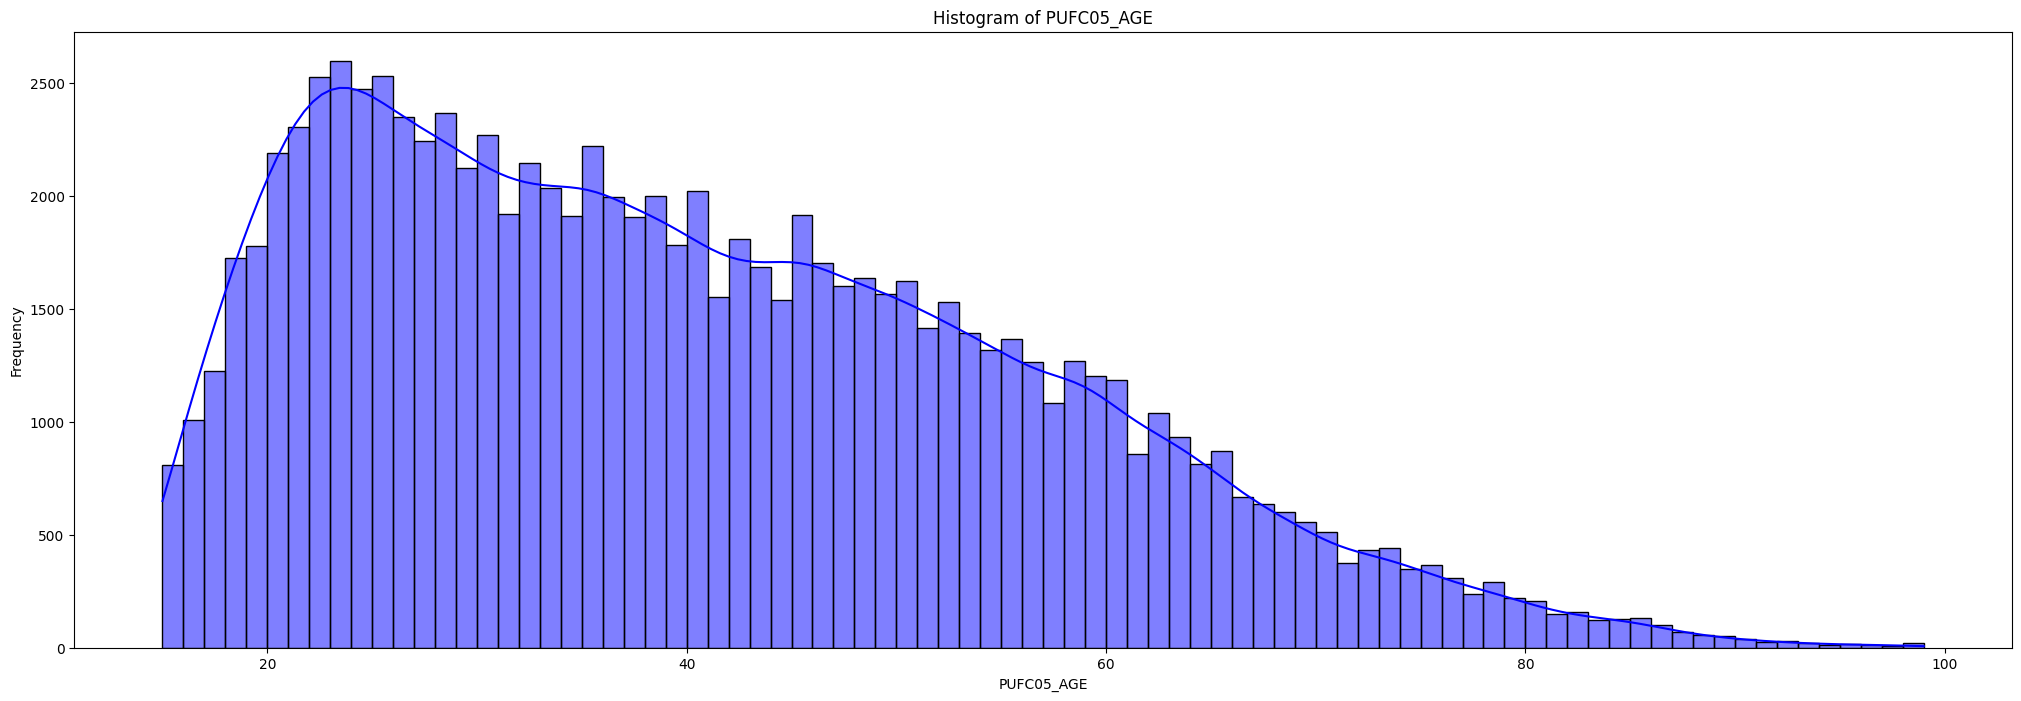

In [51]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC05_AGE"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC05_AGE") 
plt.xlabel("PUFC05_AGE")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

**PUFC06_MSTAT** - Marital Status

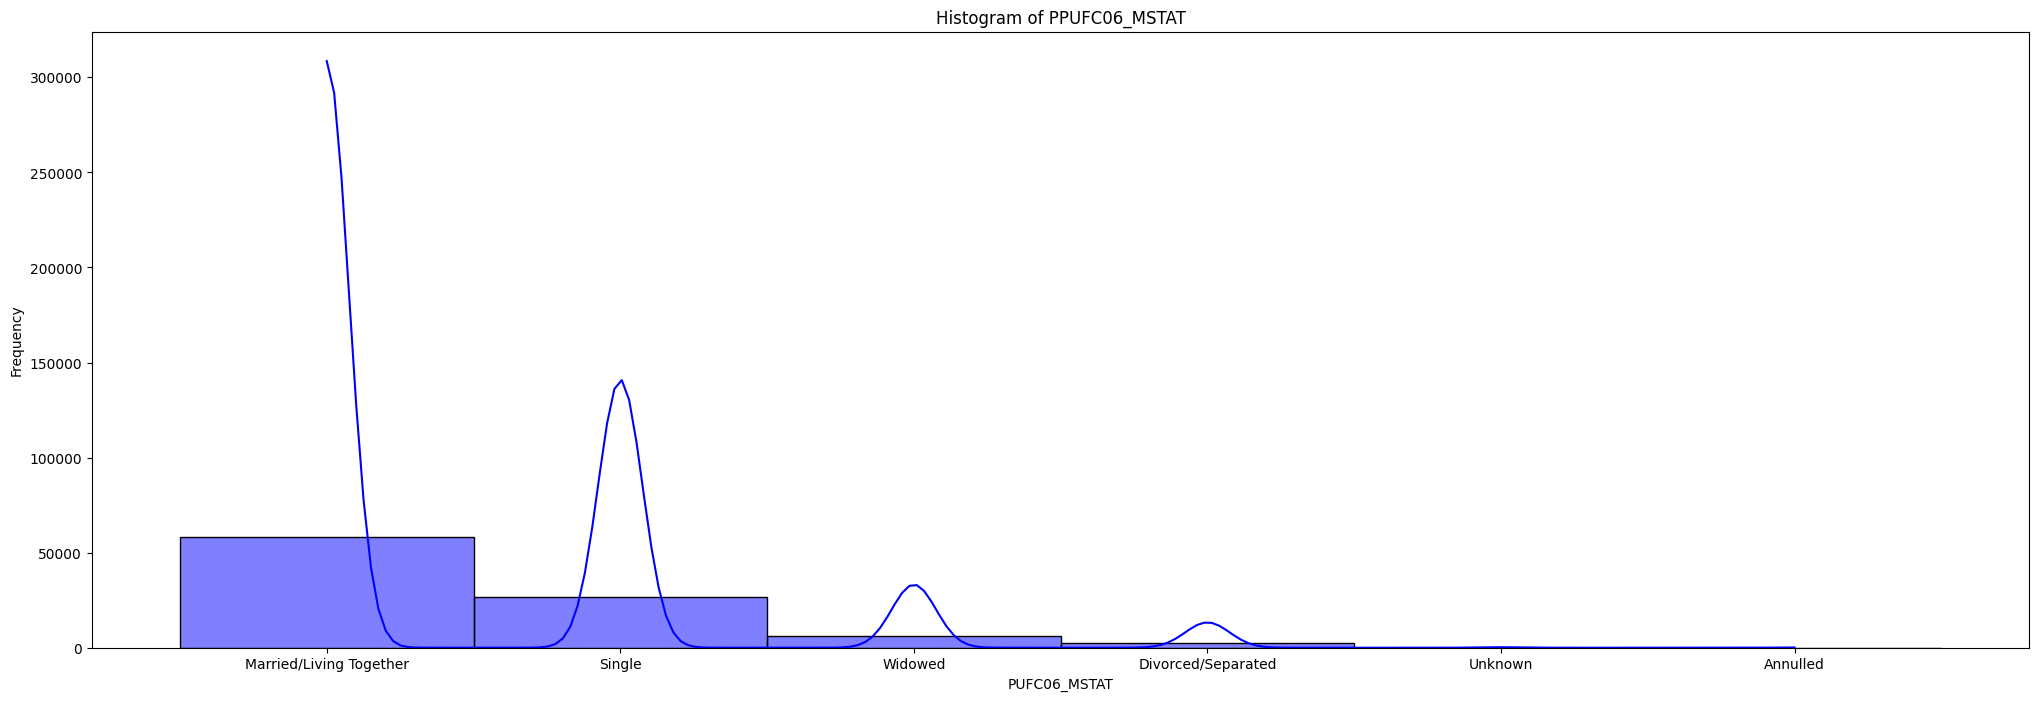

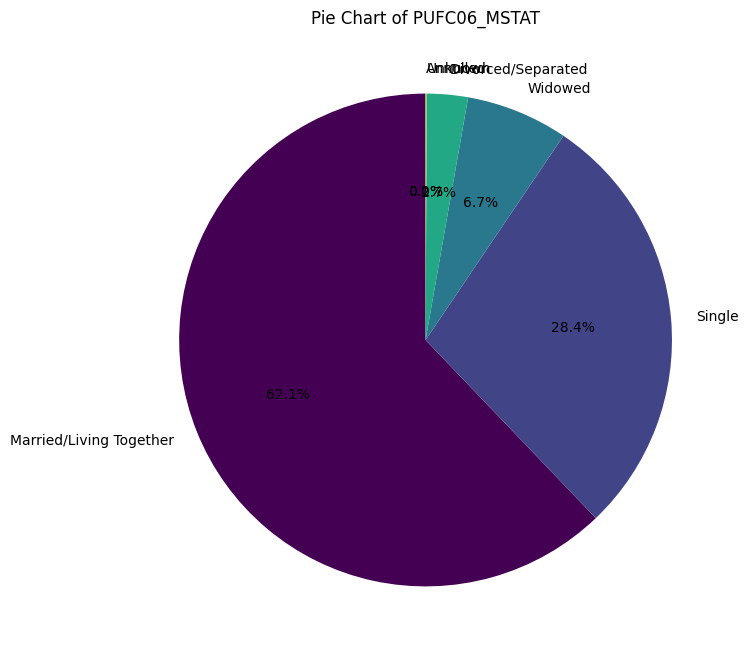

In [52]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC06_MSTAT"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PPUFC06_MSTAT") 
plt.xlabel("PUFC06_MSTAT")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

plt.figure(figsize=(20, 8))
df["PUFC06_MSTAT"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title(f"Pie Chart of PUFC06_MSTAT")
plt.ylabel("")  # Hide y-label
plt.show()

**PUFC07_GRADE** - Highest Grade Completed

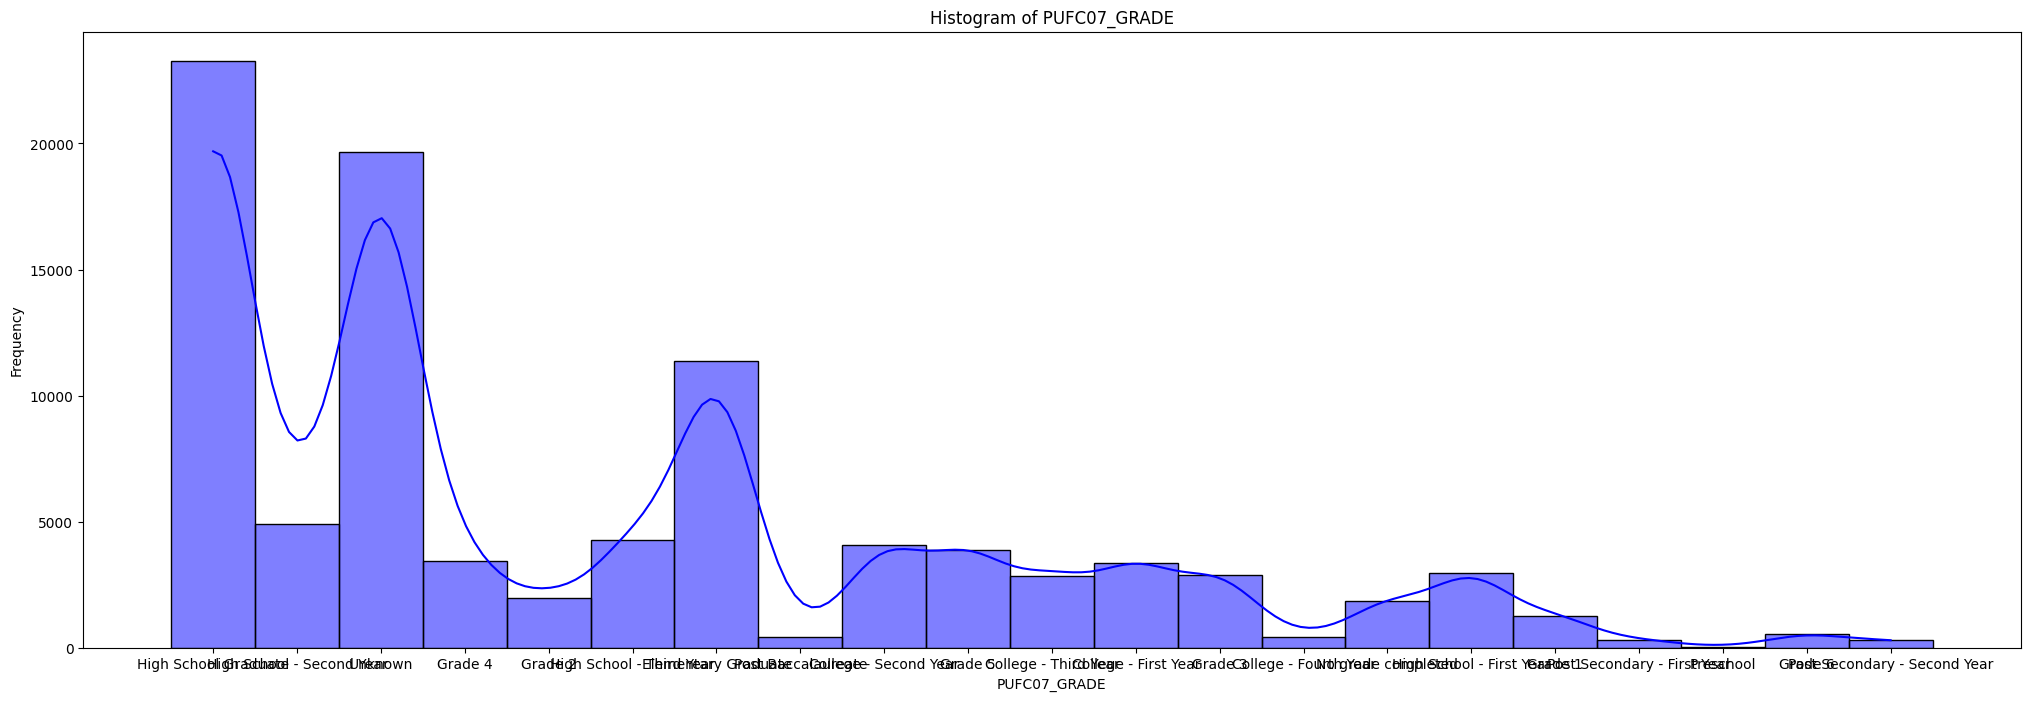

In [53]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC07_GRADE"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC07_GRADE") 
plt.xlabel("PUFC07_GRADE")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

**PUFC09_GRADTECH** - Graduate of technical/vocational course

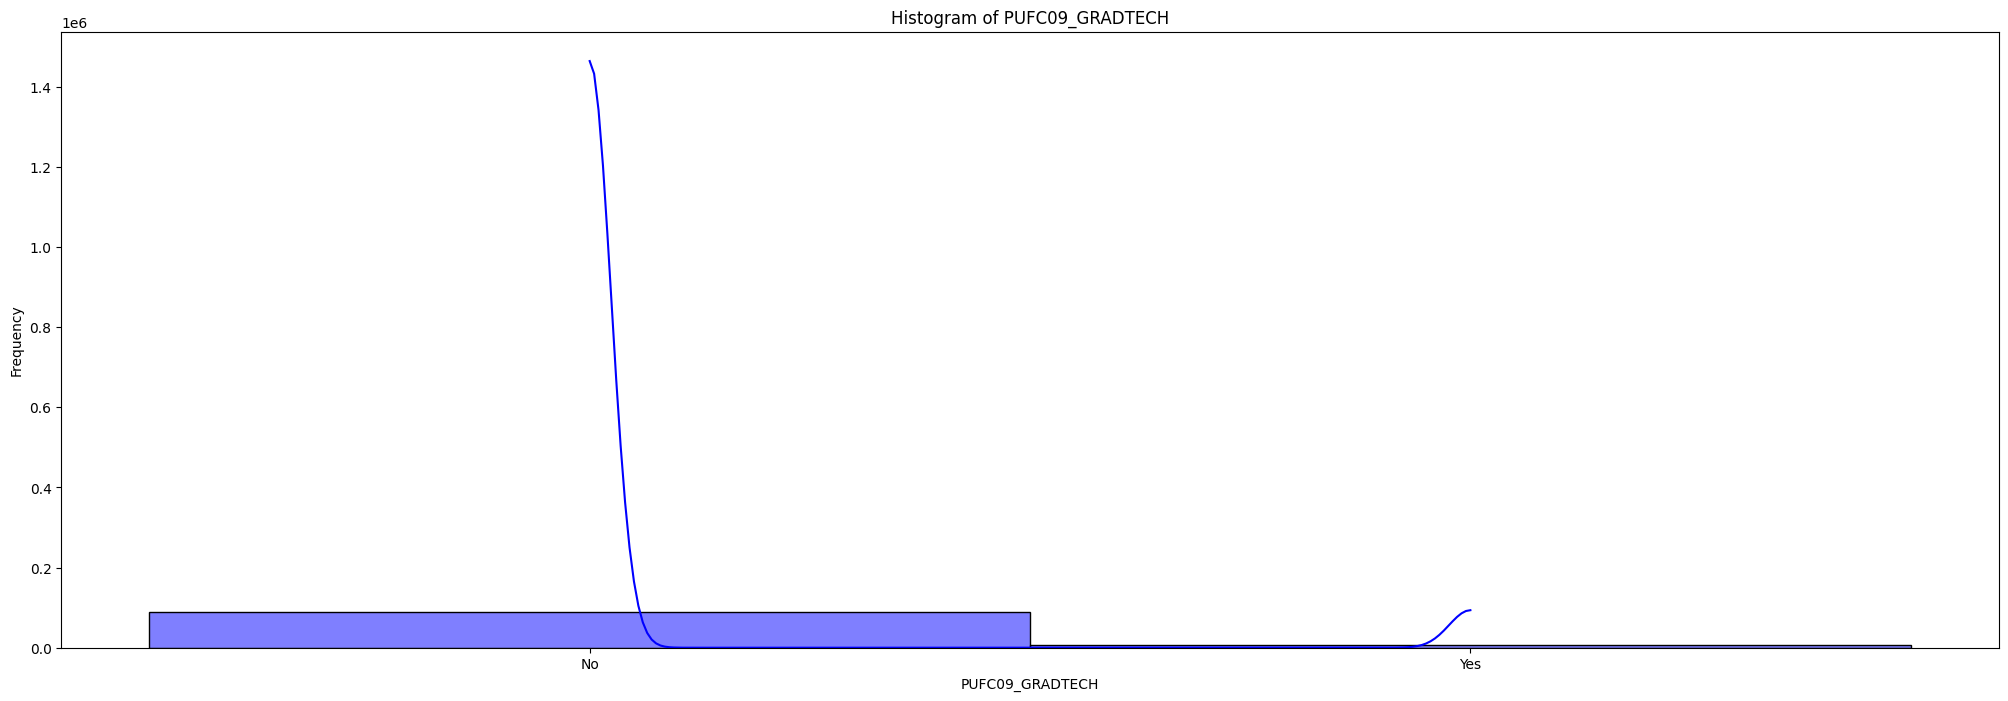

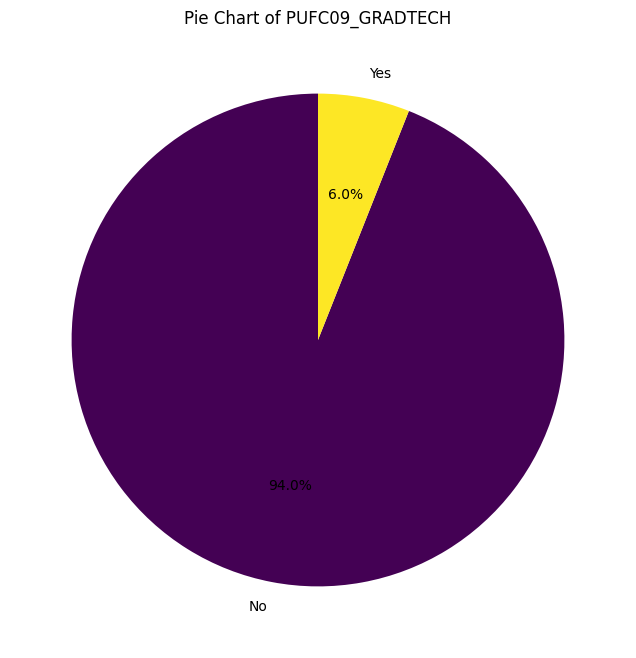

In [54]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC09_GRADTECH"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC09_GRADTECH") 
plt.xlabel("PUFC09_GRADTECH")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

plt.figure(figsize=(10, 8))
df["PUFC09_GRADTECH"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title(f"Pie Chart of PUFC09_GRADTECH")
plt.ylabel("")  # Hide y-label
plt.show()

**PUFC11_WORK** - Work Indicator

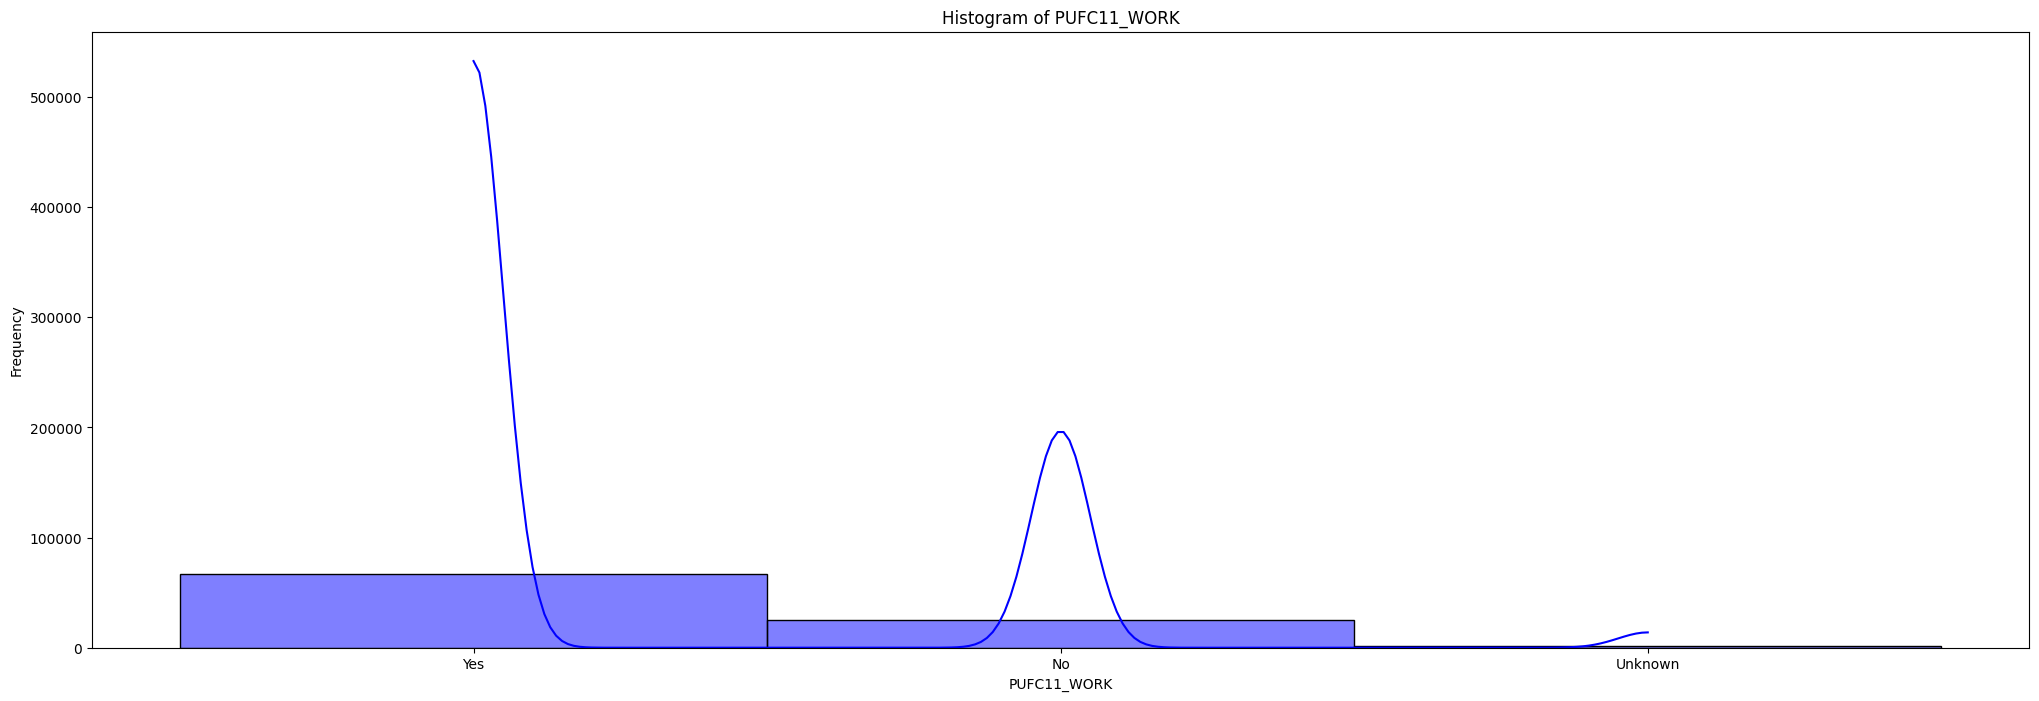

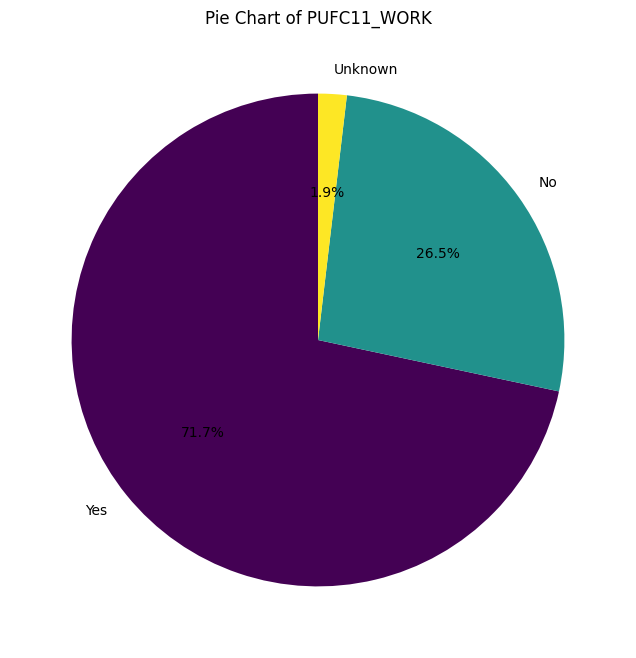

In [55]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC11_WORK"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC11_WORK") 
plt.xlabel("PUFC11_WORK")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

plt.figure(figsize=(10, 8))
df["PUFC11_WORK"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title(f"Pie Chart of PUFC11_WORK")
plt.ylabel("")  # Hide y-label
plt.show()

**PUFC14_PROCC** - Primary Occupation

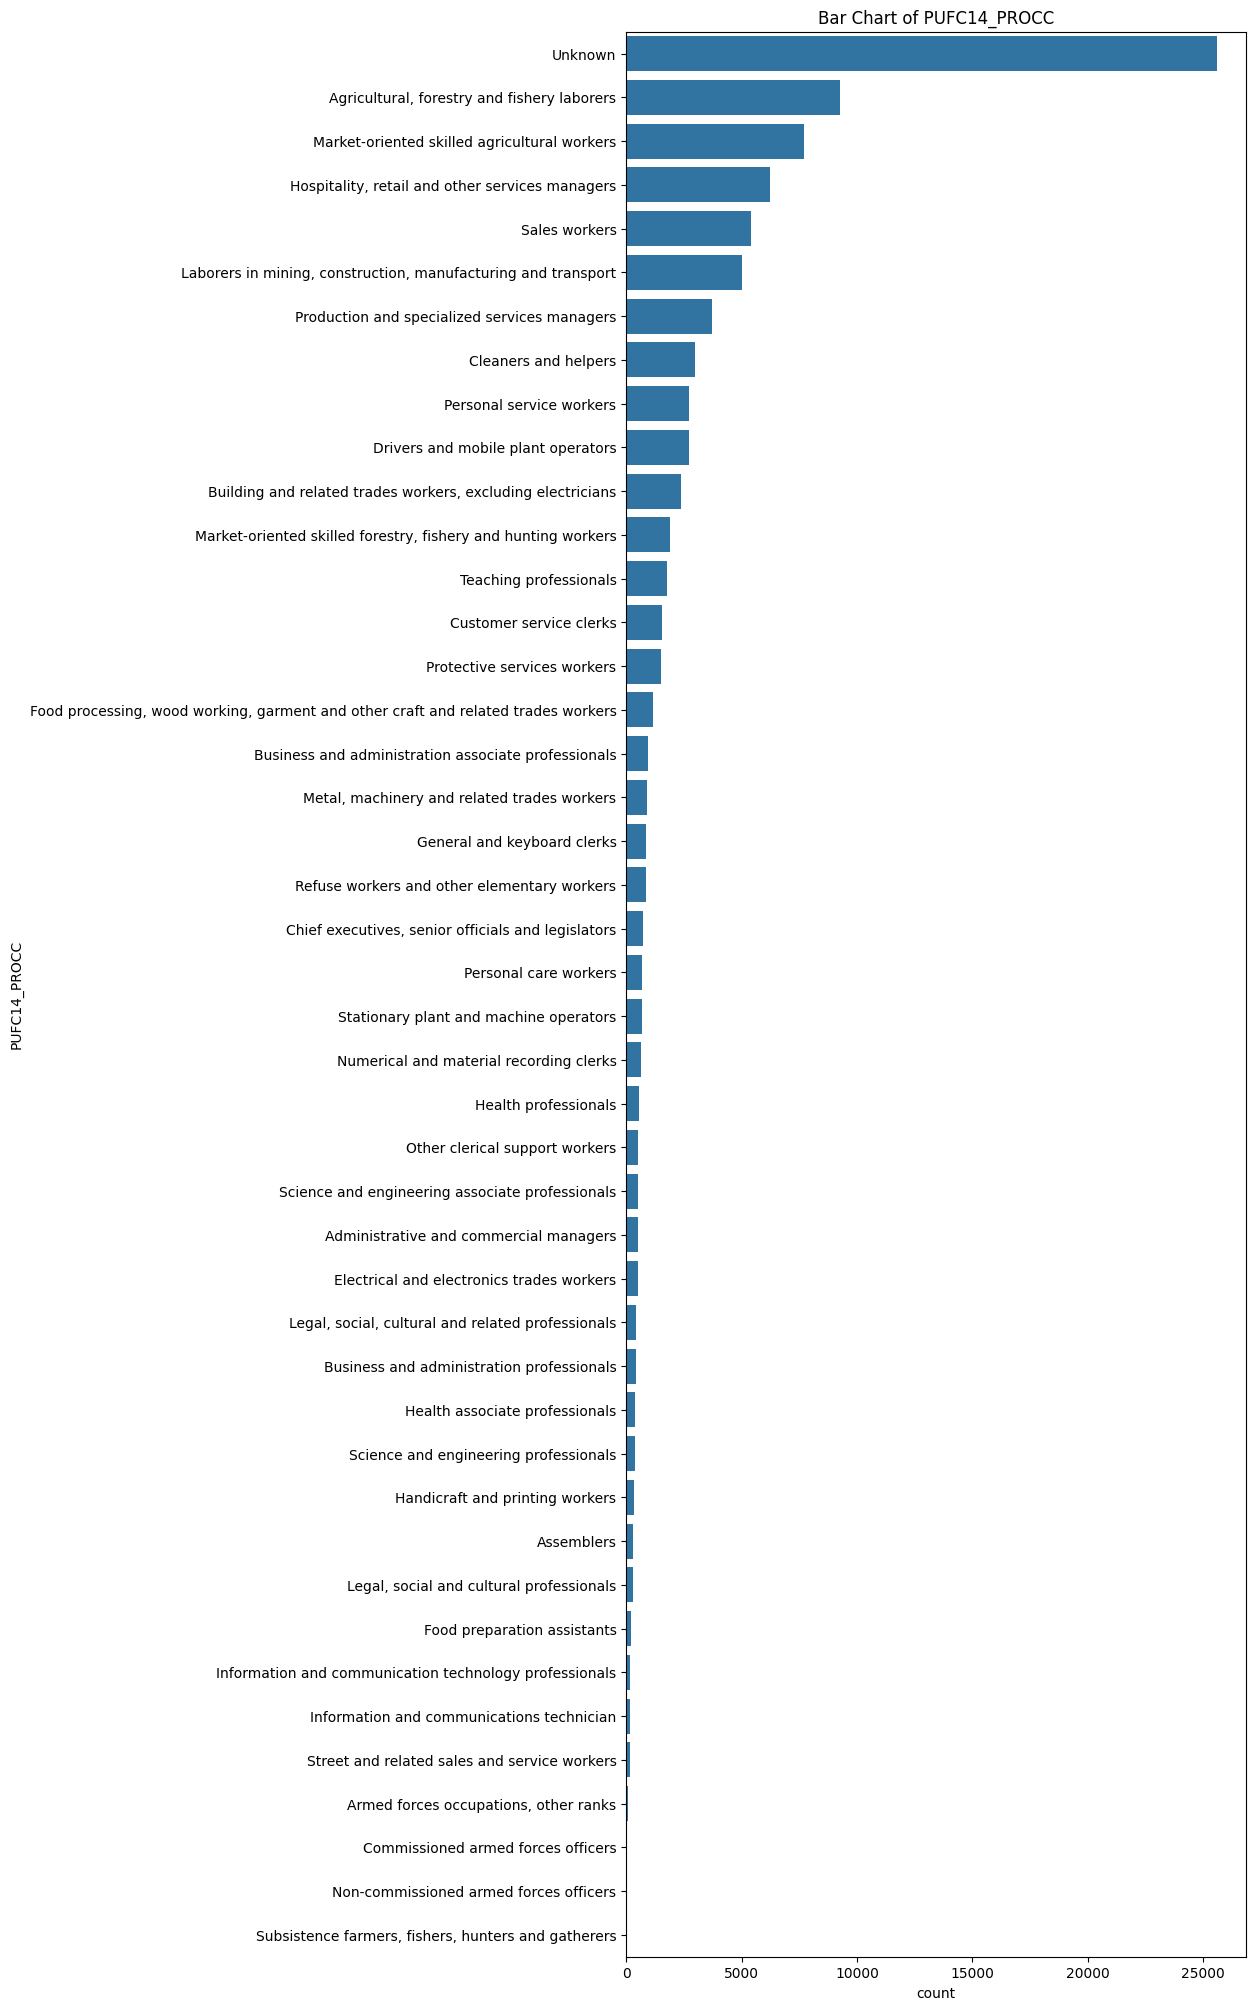

In [56]:
plt.figure(figsize=(8, 25))
sns.countplot(y=df["PUFC14_PROCC"], order=df["PUFC14_PROCC"].value_counts().index)
plt.title("Bar Chart of PUFC14_PROCC")
plt.show()

**PUFC17_NATEM** - Nature of Employment

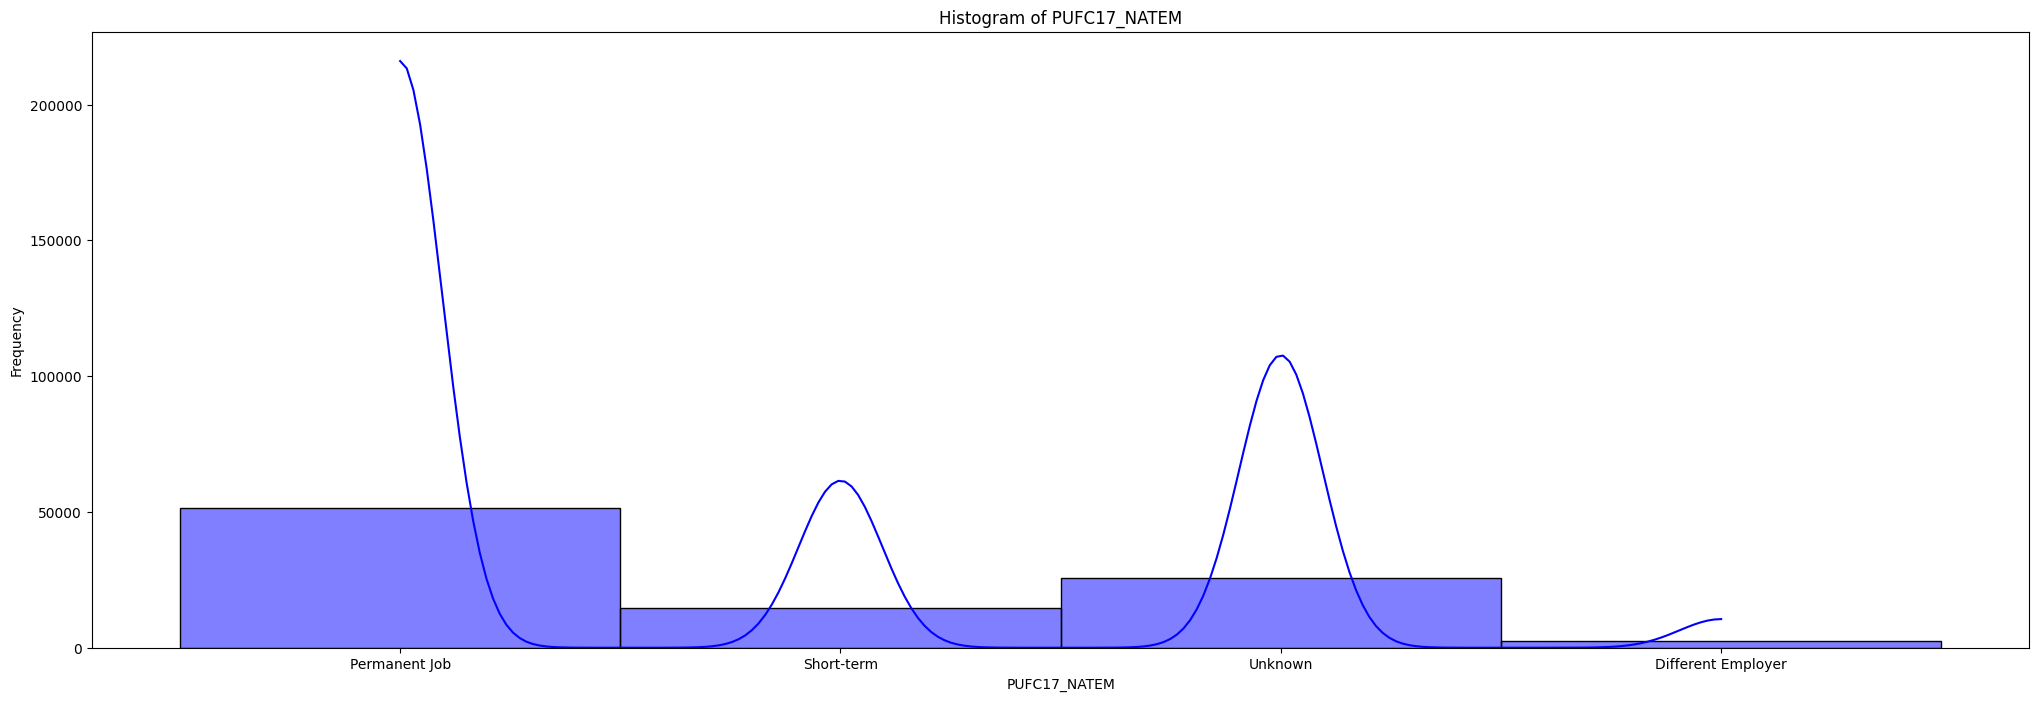

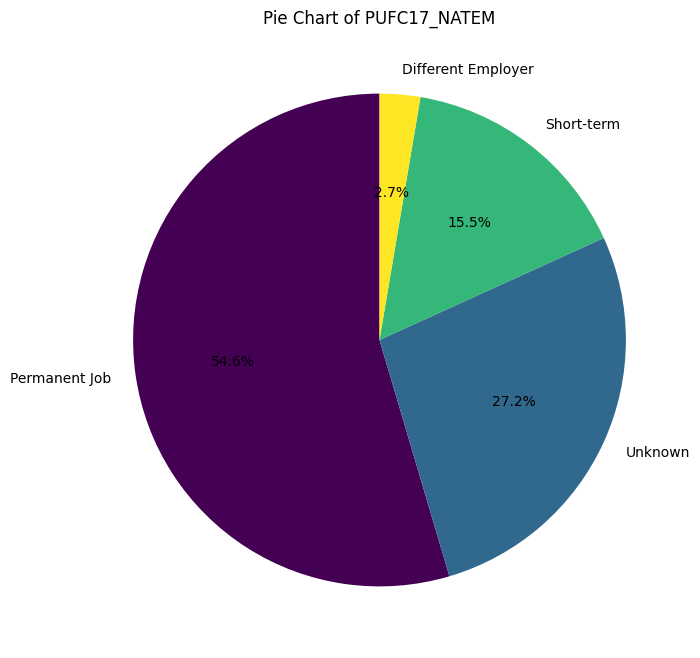

In [57]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC17_NATEM"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC17_NATEM") 
plt.xlabel("PUFC17_NATEM")
plt.ylabel("Frequency")
#plt.ylim(1000, 70000)
plt.show()

plt.figure(figsize=(10, 8))
df["PUFC17_NATEM"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="viridis")
plt.title(f"Pie Chart of PUFC17_NATEM")
plt.ylabel("")  # Hide y-label
plt.show()

**PUFC18_PNWHRS** – Normal Working Hours per Day

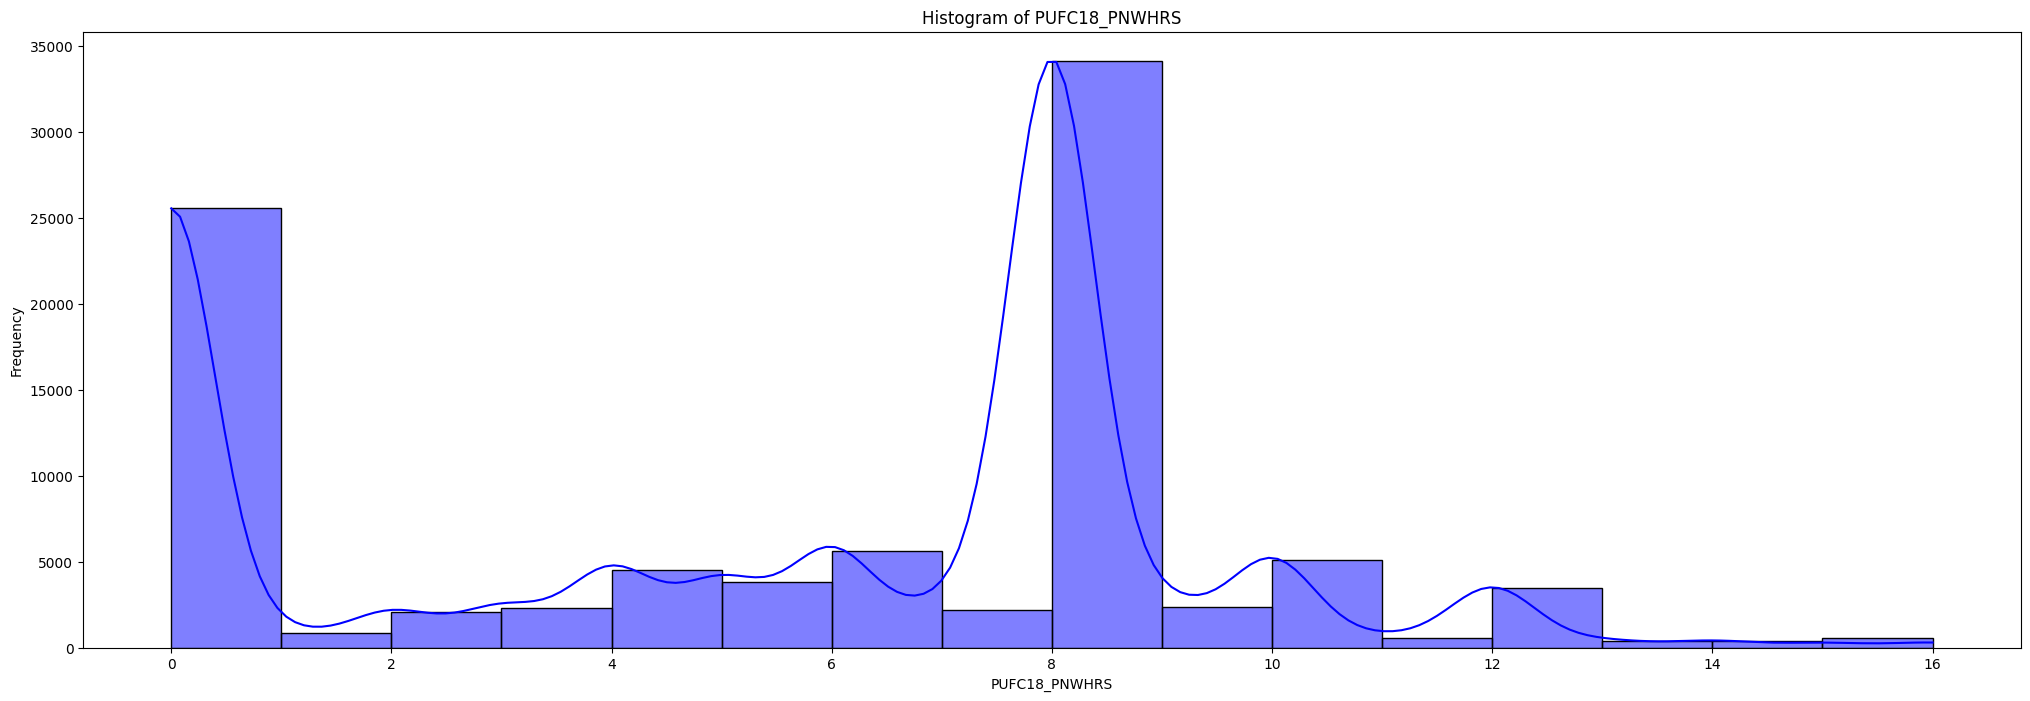

In [58]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC18_PNWHRS"], binwidth=1, kde=True, color="blue")
plt.title(f"Histogram of PUFC18_PNWHRS") 
plt.xlabel("PUFC18_PNWHRS")
plt.ylabel("Frequency")
plt.show()

**PUFC19_PHOURS** – Total Number of Hours Worked during the past week

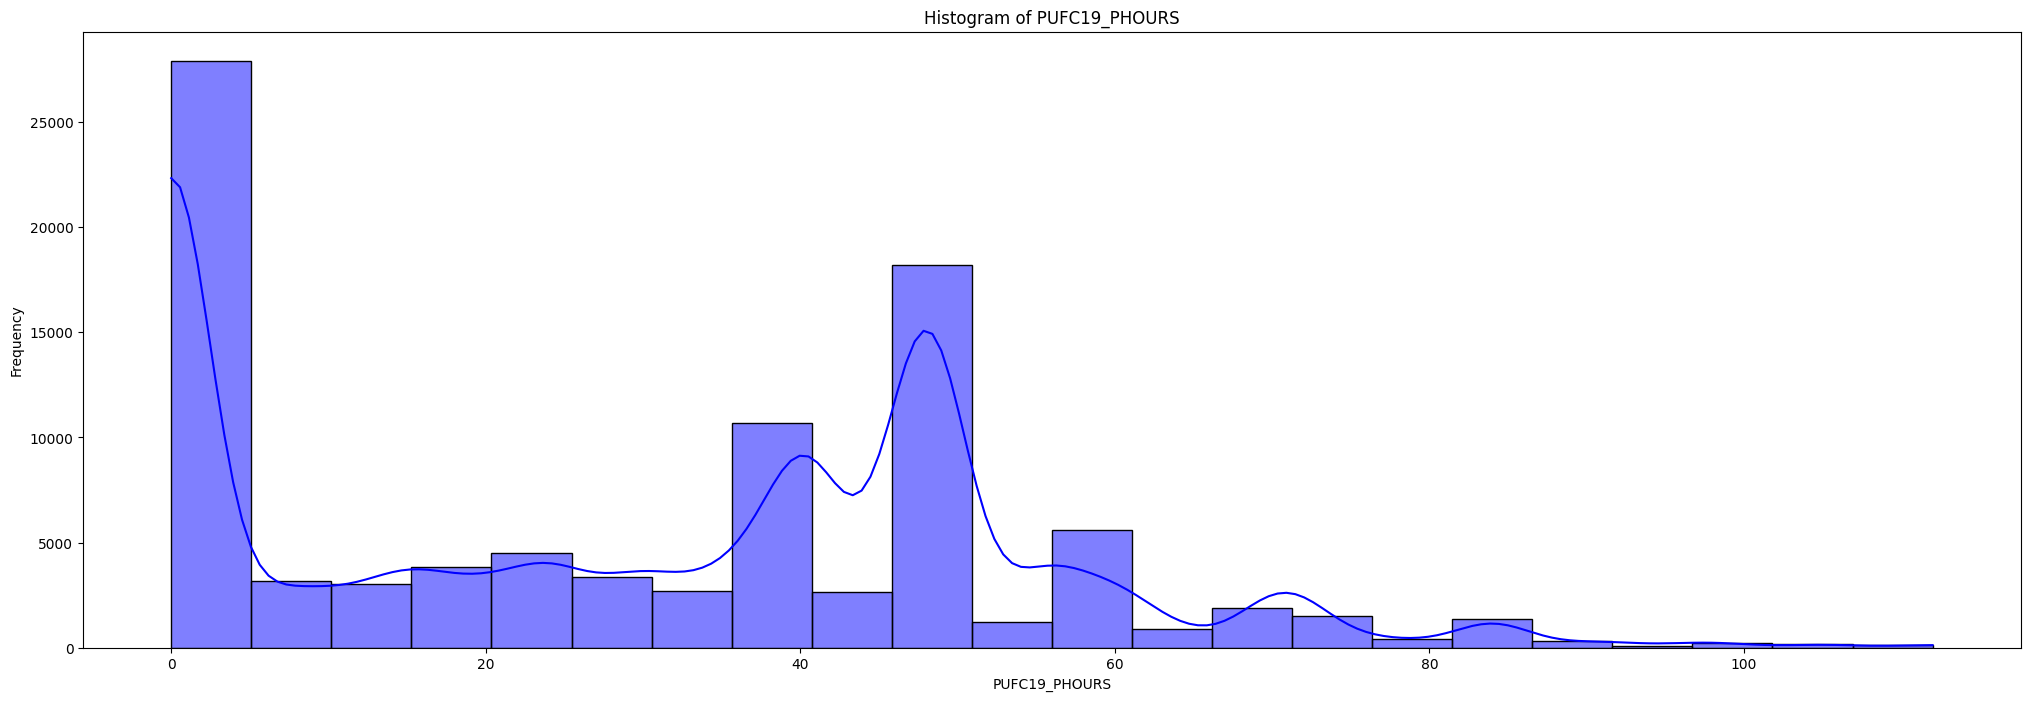

In [59]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC19_PHOURS"], binwidth=5, kde=True, color="blue")
plt.title(f"Histogram of PUFC19_PHOURS") 
plt.xlabel("PUFC19_PHOURS")
plt.ylabel("Frequency")
plt.show()

**PUFC23_PCLASS** – Class of Worker

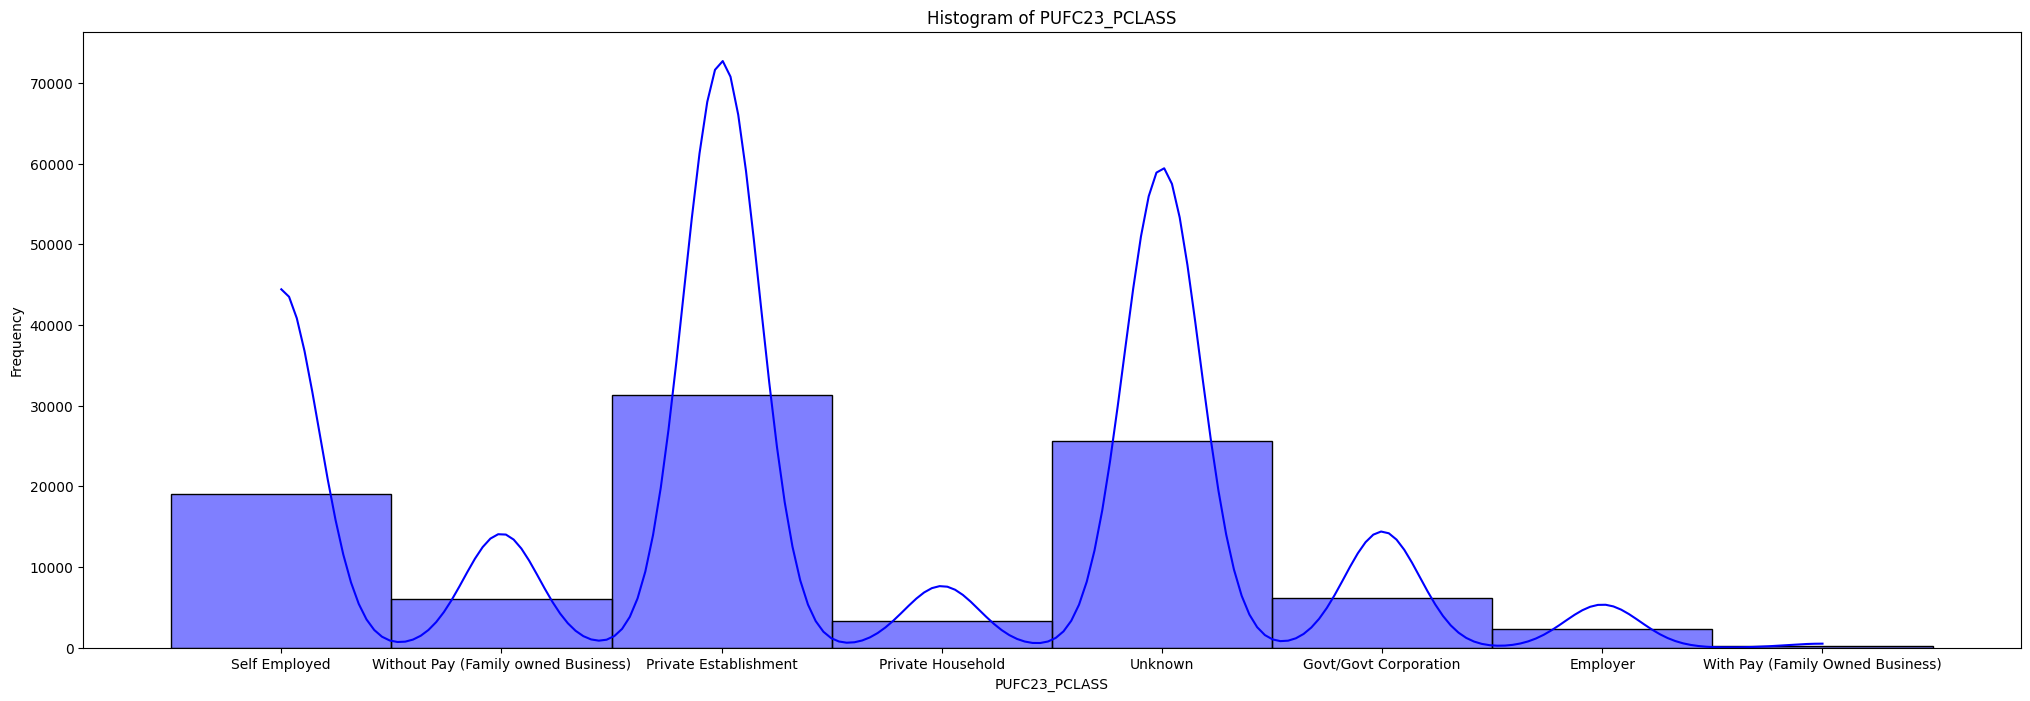

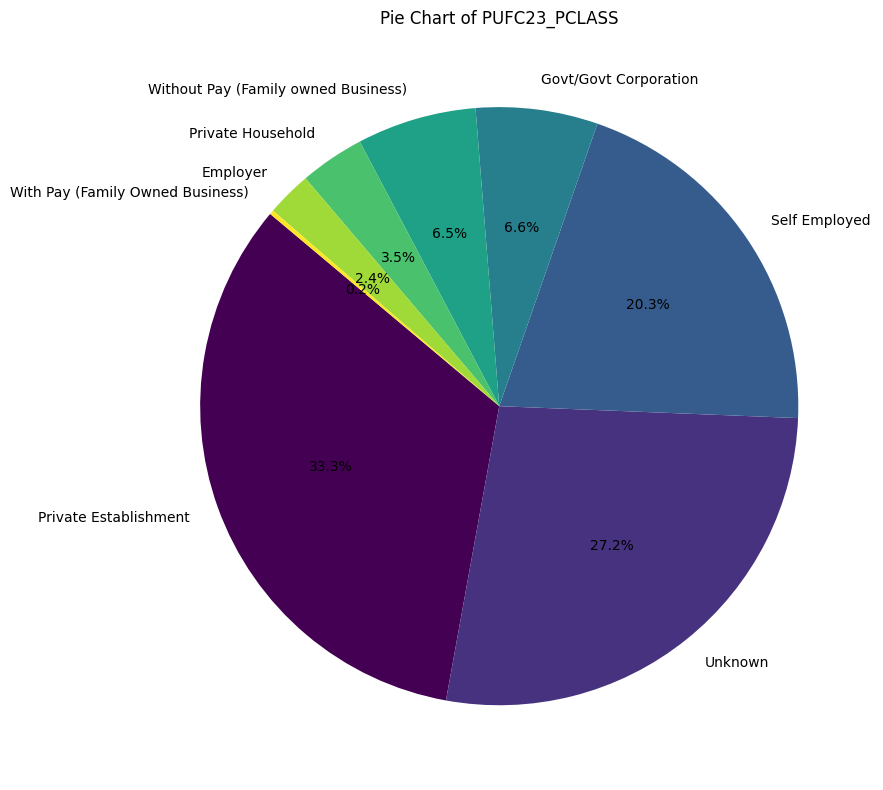

In [60]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC23_PCLASS"], binwidth=10, kde=True, color="blue")
plt.title(f"Histogram of PUFC23_PCLASS") 
plt.xlabel("PUFC23_PCLASS")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(20, 8))
df["PUFC23_PCLASS"].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="viridis")
plt.title(f"Pie Chart of PUFC23_PCLASS")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()

**PUFC41_WQTR** – Did work or had a job during the past quarter

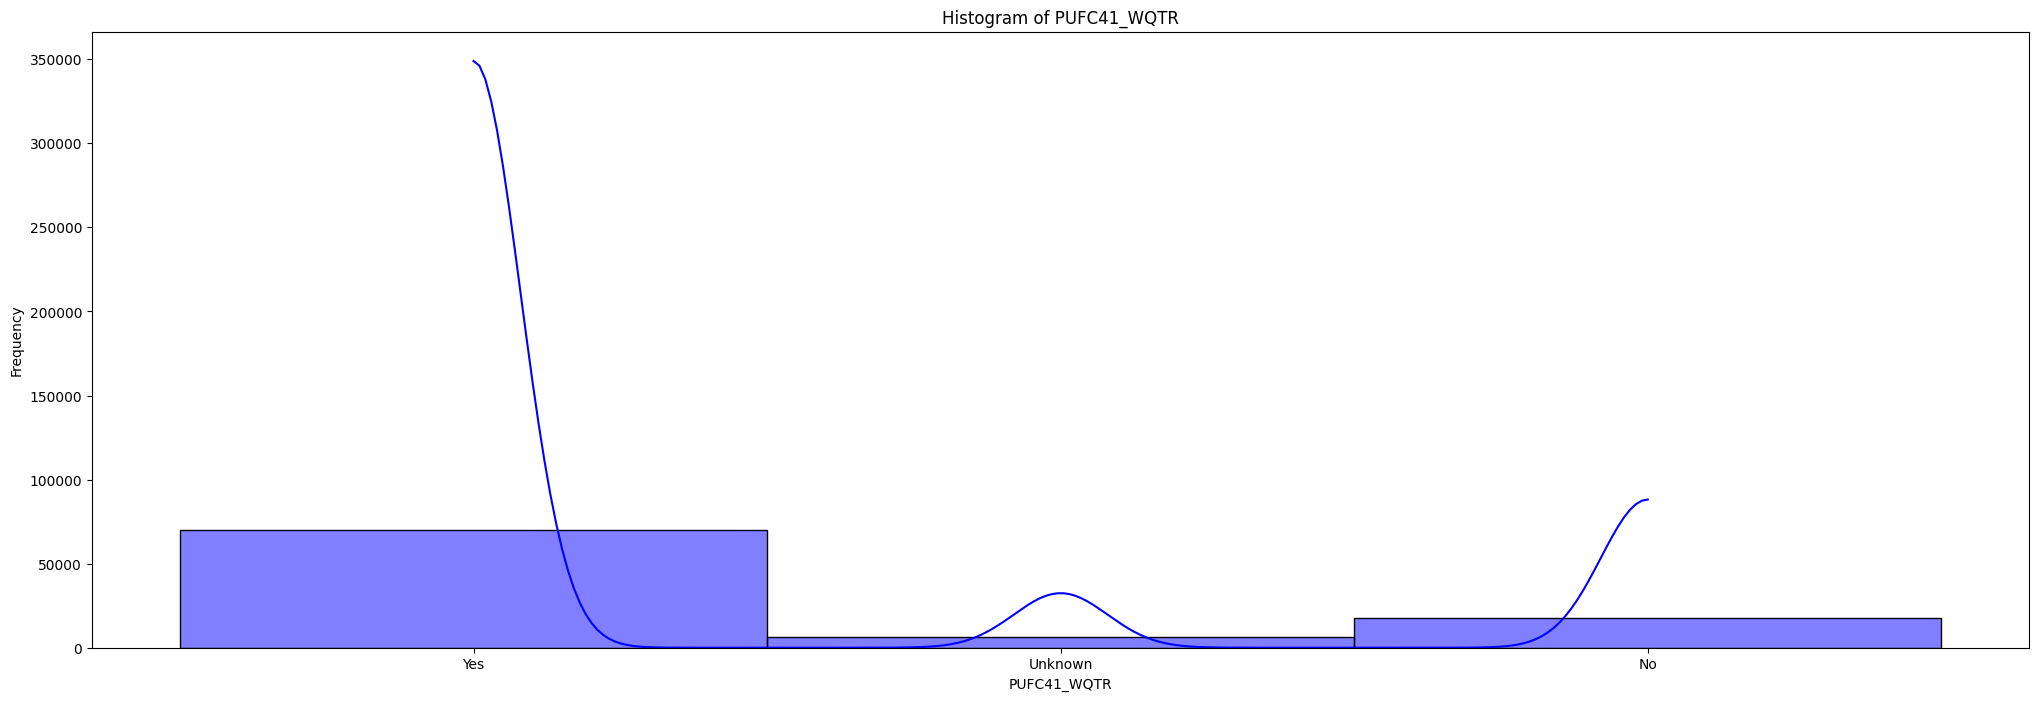

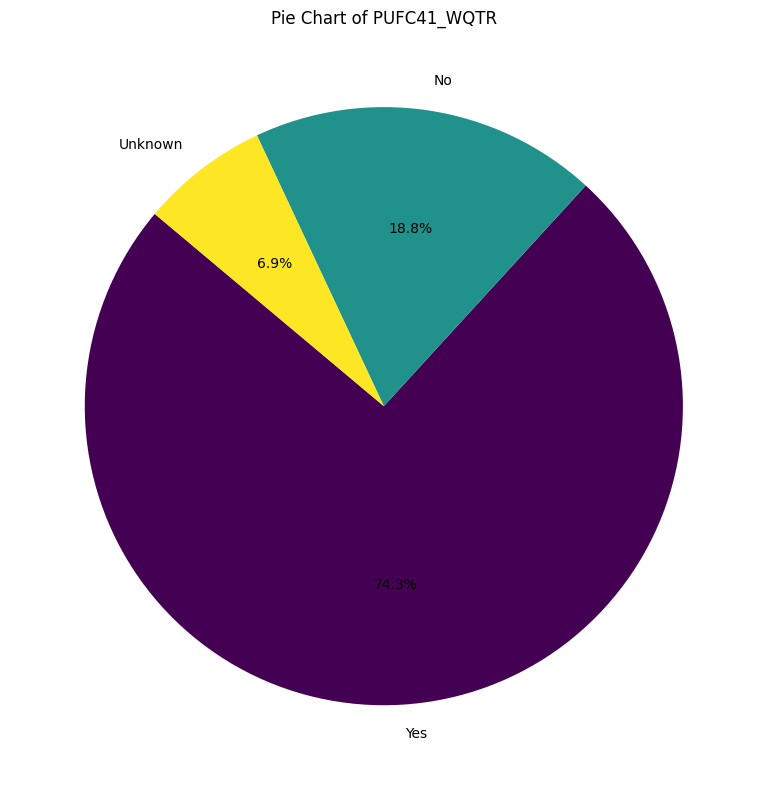

In [61]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFC41_WQTR"], binwidth=10, kde=True, color="blue")
plt.title(f"Histogram of PUFC41_WQTR") 
plt.xlabel("PUFC41_WQTR")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(20, 8))
df["PUFC41_WQTR"].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="viridis")
plt.title(f"Pie Chart of PUFC41_WQTR")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()

**PUFNEWEMPSTAT** – New Employment Criteria


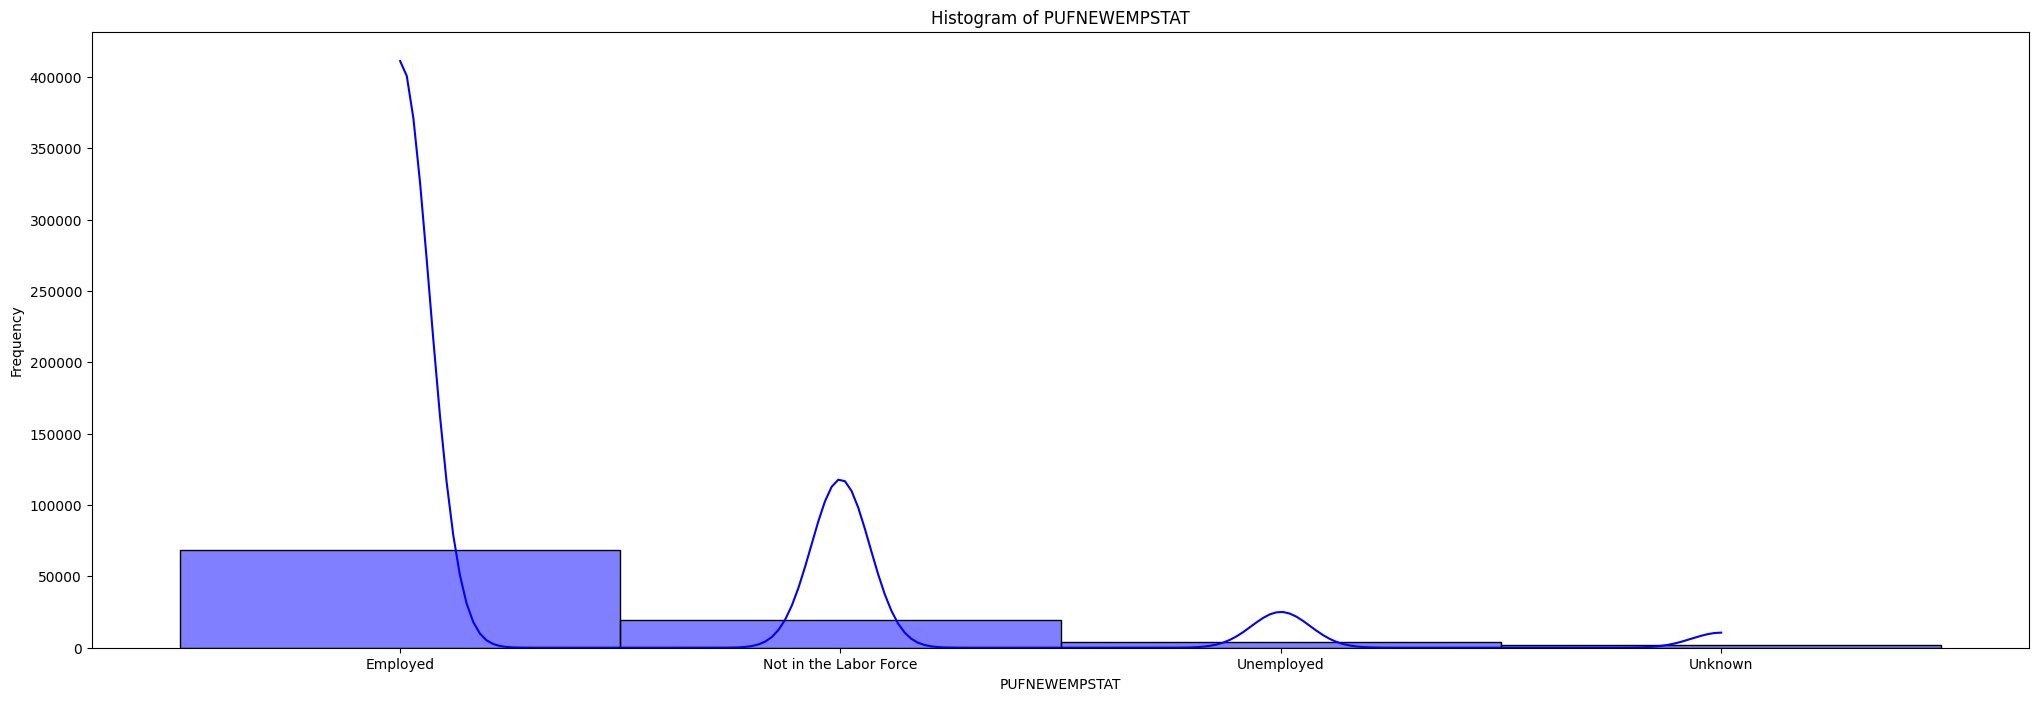

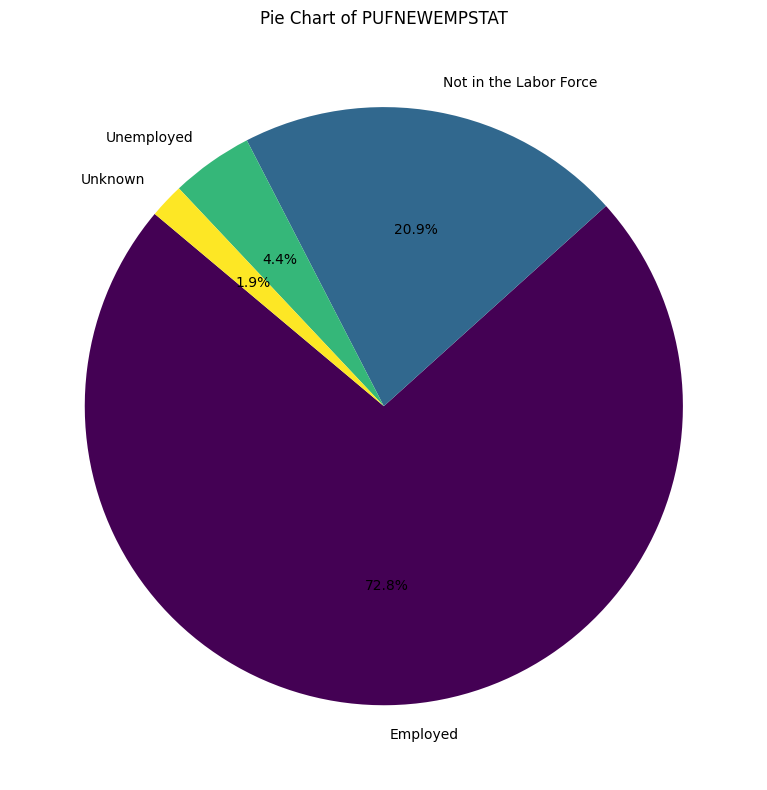

In [62]:
plt.figure(figsize=(25, 8))
sns.histplot(df["PUFNEWEMPSTAT"], binwidth=10, kde=True, color="blue")
plt.title(f"Histogram of PUFNEWEMPSTAT") 
plt.xlabel("PUFNEWEMPSTAT")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(20, 8))
df["PUFNEWEMPSTAT"].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="viridis")
plt.title(f"Pie Chart of PUFNEWEMPSTAT")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()

### Bivariate Analysis

**Does sex affect employment status?**


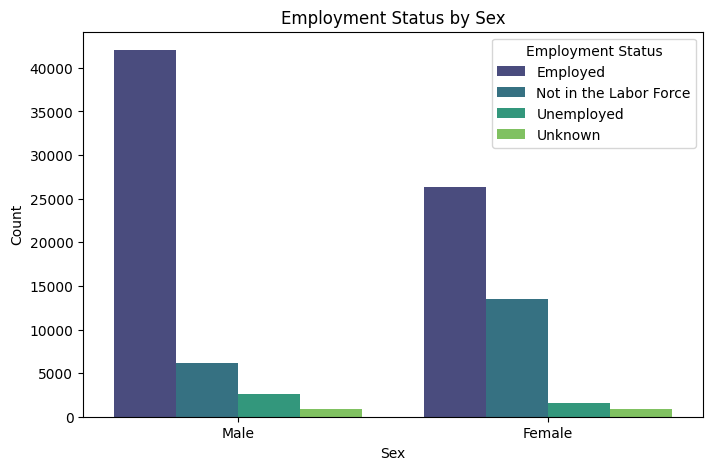

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PUFC04_SEX', hue='PUFNEWEMPSTAT', data=df, palette="viridis")
plt.title("Employment Status by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Employment Status")
plt.show()

In [64]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print("🔹 Reject H₀ - A significant relationship exists between the variables.")
    else:
        print("Fail to Reject H₀ - No significant relationship found.")

chi_square_test(df, 'PUFC04_SEX', 'PUFNEWEMPSTAT')

Chi-Square Test between PUFC04_SEX and PUFNEWEMPSTAT:
Chi-Square Statistic: 5642.319082760792
p-value: 0.0
🔹 Reject H₀ - A significant relationship exists between the variables.


**How does age impact employment status?**

Since there are too many unique age values, ages are grouped into bins (e.g., 5-year intervals) to reduce clutter in the plot.

In [65]:
bins = list(range(15, 105, 5))  
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]
df["PUFC05_AGEGRP"] = pd.cut(df["PUFC05_AGE"], bins=bins, labels=labels, right=False)

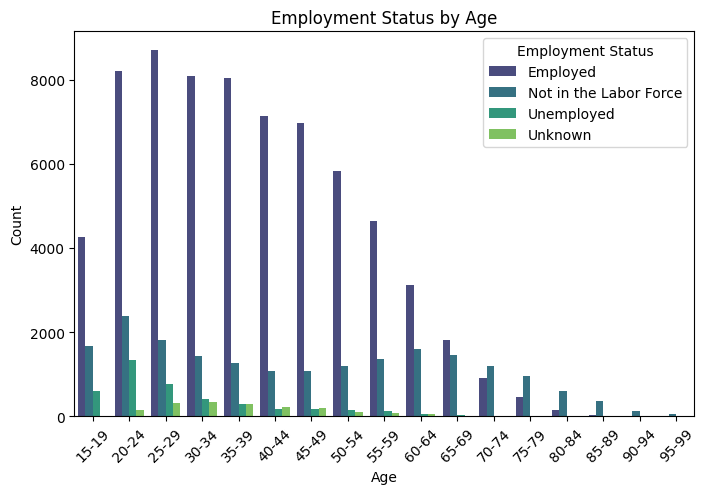

In [66]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PUFC05_AGEGRP', hue='PUFNEWEMPSTAT', data=df, palette="viridis")
plt.title("Employment Status by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Employment Status")
plt.xticks(rotation=45) 
plt.show()

In [67]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print("🔹 Reject H₀ - A significant relationship exists between the variables.")
    else:
        print("Fail to Reject H₀ - No significant relationship found.")

chi_square_test(df, 'PUFC05_AGEGRP', 'PUFNEWEMPSTAT')

Chi-Square Test between PUFC05_AGEGRP and PUFNEWEMPSTAT:
Chi-Square Statistic: 12899.43811472188
p-value: 0.0
🔹 Reject H₀ - A significant relationship exists between the variables.


**Does marital status affect employment status?**

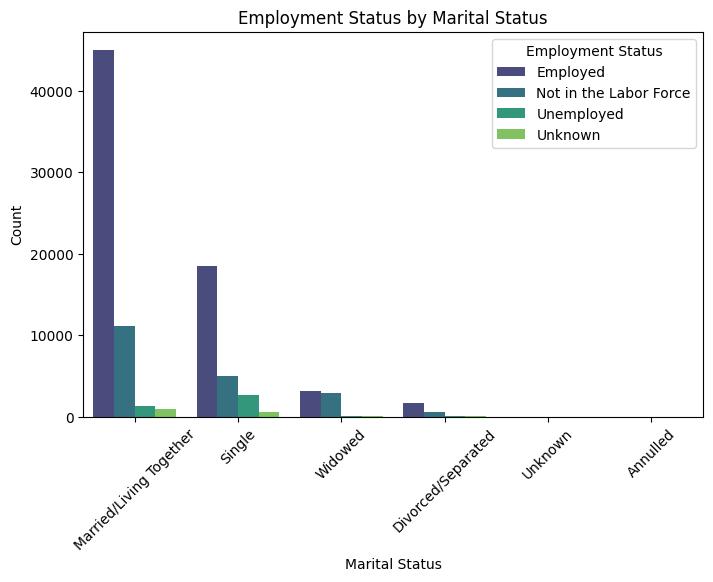

In [68]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PUFC06_MSTAT', hue='PUFNEWEMPSTAT', data=df, palette="viridis")
plt.title("Employment Status by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Employment Status")  
plt.xticks(rotation=45) 
plt.show()

In [69]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print("🔹 Reject H₀ - A significant relationship exists between the variables.")
    else:
        print("Fail to Reject H₀ - No significant relationship found.")

chi_square_test(df, 'PUFC06_MSTAT', 'PUFNEWEMPSTAT')

Chi-Square Test between PUFC06_MSTAT and PUFNEWEMPSTAT:
Chi-Square Statistic: 5816.767636508815
p-value: 0.0
🔹 Reject H₀ - A significant relationship exists between the variables.


**How does highest grade completed impact employment status?**

Similar to age, the education levels were grouped into broader categories to simplify the plot and improve readability.

In [70]:
education_bins = {
    'Preschool': 'Preschool',

    'Grade 1': 'Elementary', 'Grade 2': 'Elementary', 'Grade 3': 'Elementary', 
    'Grade 4': 'Elementary', 'Grade 5': 'Elementary', 'Grade 6': 'Elementary', 
    'Elementary Graduate': 'Elementary Graduate',

    'High School - First Year': 'High School', 'High School - Second Year': 'High School', 'High School - Third Year': 'High School', 
    'High School Graduate': 'High School Graduate',

    'Post Secondary - First Year' : 'Post Secondary',
    'Post Secondary - Second Year': 'Post Secondary',

    'College - First Year': 'College', 'College - Second Year': 'College', 
    'College - Third Year': 'College', 'College - Fourth Year': 'College',

    'Post Baccalaureate': 'Post Baccalaureate'
}

df['PUFC07_GRADEMP'] = df['PUFC07_GRADE'].replace(education_bins)

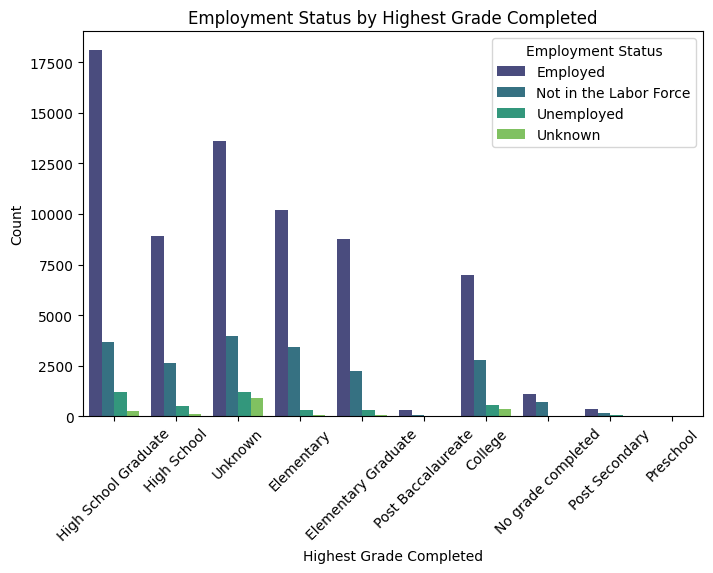

In [71]:
plt.figure(figsize=(8, 5))
sns.countplot(x='PUFC07_GRADEMP', hue='PUFNEWEMPSTAT', data=df, palette="viridis")
plt.title("Employment Status by Highest Grade Completed")
plt.xlabel("Highest Grade Completed")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.legend(title="Employment Status")
plt.show()

In [72]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print("🔹 Reject H₀ - A significant relationship exists between the variables.")
    else:
        print("Fail to Reject H₀ - No significant relationship found.")

chi_square_test(df, 'PUFC07_GRADEMP', 'PUFNEWEMPSTAT')

Chi-Square Test between PUFC07_GRADEMP and PUFNEWEMPSTAT:
Chi-Square Statistic: 2862.1996782648193
p-value: 0.0
🔹 Reject H₀ - A significant relationship exists between the variables.


**Is there a relationship between class of worker and employment status?**

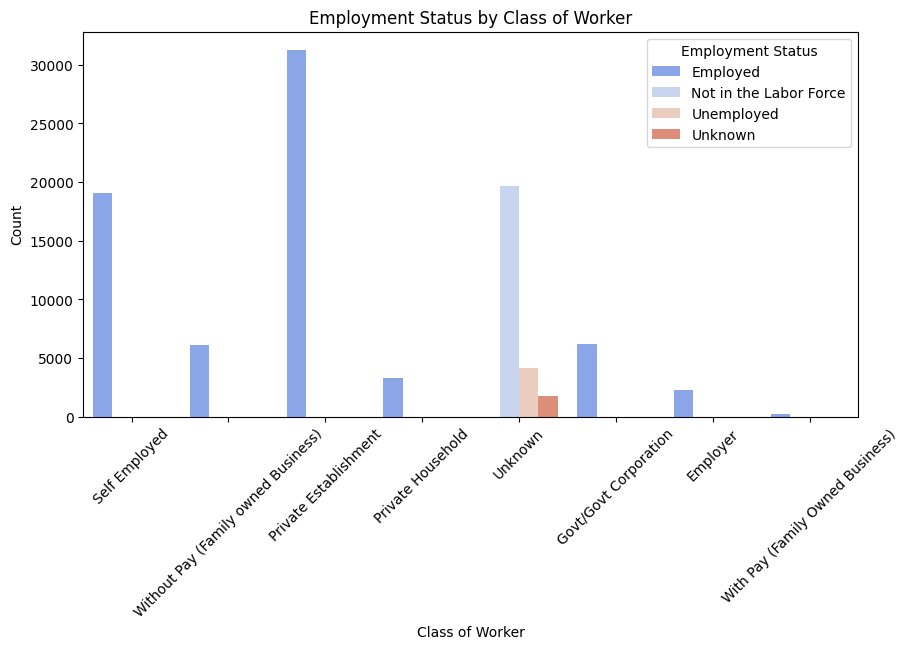

In [73]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PUFC23_PCLASS', hue='PUFNEWEMPSTAT', data=df, palette="coolwarm")
plt.title("Employment Status by Class of Worker")
plt.xlabel("Class of Worker")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.legend(title="Employment Status")
plt.show()

In [74]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print("🔹 Reject H₀ - A significant relationship exists between the variables.")
    else:
        print("Fail to Reject H₀ - No significant relationship found.")

chi_square_test(df, 'PUFC23_PCLASS', 'PUFNEWEMPSTAT')

Chi-Square Test between PUFC23_PCLASS and PUFNEWEMPSTAT:
Chi-Square Statistic: 94001.0
p-value: 0.0
🔹 Reject H₀ - A significant relationship exists between the variables.


**How do employment status and nature of employment interact?**

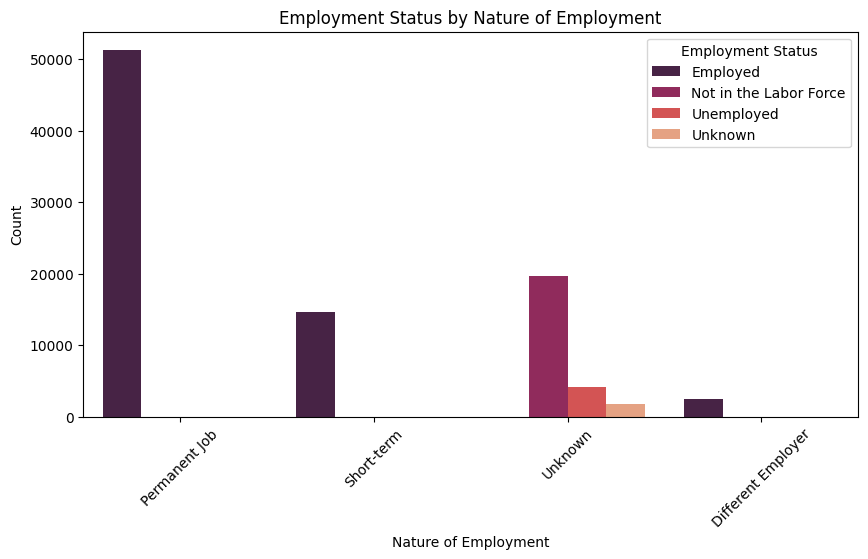

In [75]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PUFC17_NATEM', hue='PUFNEWEMPSTAT', data=df, palette="rocket")
plt.title("Employment Status by Nature of Employment")
plt.xlabel("Nature of Employment")
plt.ylabel("Count")
plt.xticks(rotation=45) 
plt.legend(title="Employment Status")
plt.show()

In [76]:
def chi_square_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {col1} and {col2}:")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"p-value: {p}")
    
    if p < 0.05:
        print("🔹 Reject H₀ - A significant relationship exists between the variables.")
    else:
        print("Fail to Reject H₀ - No significant relationship found.")

chi_square_test(df, 'PUFC17_NATEM', 'PUFNEWEMPSTAT')


Chi-Square Test between PUFC17_NATEM and PUFNEWEMPSTAT:
Chi-Square Statistic: 94001.0
p-value: 0.0
🔹 Reject H₀ - A significant relationship exists between the variables.


### Heatmap Correlation

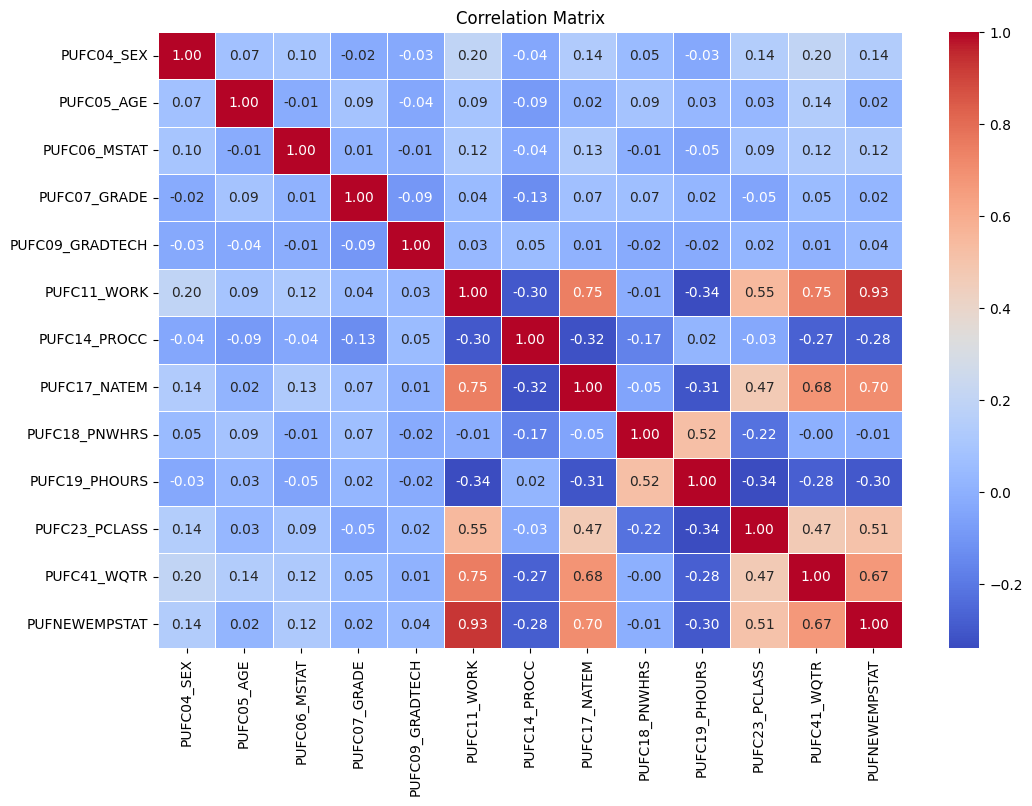

In [77]:
encoded_df = df.copy()

categorical_cols = ['PUFC04_SEX', 'PUFC06_MSTAT', 'PUFC07_GRADE', 'PUFC09_GRADTECH', 
                    'PUFC11_WORK', 'PUFC14_PROCC', 'PUFC17_NATEM', 'PUFC18_PNWHRS', 
                    'PUFC19_PHOURS', 'PUFC23_PCLASS', 'PUFC41_WQTR', 'PUFNEWEMPSTAT']

encoded_df[categorical_cols] = encoded_df[categorical_cols].apply(lambda x: pd.factorize(x)[0])

correlation_matrix = encoded_df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### Label Encoding

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94001 entries, 0 to 94000
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PUFC04_SEX       94001 non-null  object  
 1   PUFC05_AGE       94001 non-null  int64   
 2   PUFC06_MSTAT     94001 non-null  object  
 3   PUFC07_GRADE     94001 non-null  object  
 4   PUFC09_GRADTECH  94001 non-null  object  
 5   PUFC11_WORK      94001 non-null  object  
 6   PUFC14_PROCC     94001 non-null  object  
 7   PUFC17_NATEM     94001 non-null  object  
 8   PUFC18_PNWHRS    94001 non-null  int64   
 9   PUFC19_PHOURS    94001 non-null  int64   
 10  PUFC23_PCLASS    94001 non-null  object  
 11  PUFC41_WQTR      94001 non-null  object  
 12  PUFNEWEMPSTAT    94001 non-null  object  
 13  PUFC05_AGEGRP    94001 non-null  category
 14  PUFC07_GRADEMP   94001 non-null  object  
dtypes: category(1), int64(3), object(11)
memory usage: 10.1+ MB


In [79]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("cleaned_data.csv")

categorical_cols = df.select_dtypes(include=['object']).columns ## filter to object cols

label_encoders = {}

## this encode the columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

## print the mappings 
for col, le in label_encoders.items():
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print()
    print(col)
    for original, encoded in mapping.items():
        print(f"{original} -> {encoded}")


PUFC04_SEX
Female -> 0
Male -> 1

PUFC06_MSTAT
Annulled -> 0
Divorced/Separated -> 1
Married/Living Together -> 2
Single -> 3
Unknown -> 4
Widowed -> 5

PUFC07_GRADE
College - First Year -> 0
College - Fourth Year -> 1
College - Second Year -> 2
College - Third Year -> 3
Elementary Graduate -> 4
Grade 1 -> 5
Grade 2 -> 6
Grade 3 -> 7
Grade 4 -> 8
Grade 5 -> 9
Grade 6 -> 10
High School - First Year -> 11
High School - Second Year -> 12
High School - Third Year -> 13
High School Graduate -> 14
No grade completed -> 15
Post Baccalaureate -> 16
Post Secondary - First Year -> 17
Post Secondary - Second Year -> 18
Preschool -> 19
Unknown -> 20

PUFC09_GRADTECH
No -> 0
Yes -> 1

PUFC11_WORK
No -> 0
Unknown -> 1
Yes -> 2

PUFC14_PROCC
Administrative and commercial managers -> 0
Agricultural, forestry and fishery laborers -> 1
Armed forces occupations, other ranks -> 2
Assemblers -> 3
Building and related trades workers, excluding electricians -> 4
Business and administration associate profess

In [80]:
display(df)
df.info()

,PUFC04_SEX,PUFC05_AGE,PUFC06_MSTAT,PUFC07_GRADE,PUFC09_GRADTECH,PUFC11_WORK,PUFC14_PROCC,PUFC17_NATEM,PUFC18_PNWHRS,PUFC19_PHOURS,PUFC23_PCLASS,PUFC41_WQTR,PUFNEWEMPSTAT
0,1,49,2,14,0,2,25,1,8,24,4,2,0
1,0,61,2,14,0,2,1,2,4,8,7,2,0
2,1,19,3,14,0,2,1,2,8,24,2,2,0
3,1,48,2,12,0,2,25,1,4,20,4,2,0
4,0,41,2,14,0,2,8,1,12,72,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93996,1,34,2,15,0,2,26,1,5,30,4,2,0
93997,0,32,2,15,0,2,25,1,4,28,4,2,0
93998,1,29,2,14,0,2,33,1,8,40,0,2,0
93999,0,29,2,3,0,0,43,3,0,0,5,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94001 entries, 0 to 94000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   PUFC04_SEX       94001 non-null  int64
 1   PUFC05_AGE       94001 non-null  int64
 2   PUFC06_MSTAT     94001 non-null  int64
 3   PUFC07_GRADE     94001 non-null  int64
 4   PUFC09_GRADTECH  94001 non-null  int64
 5   PUFC11_WORK      94001 non-null  int64
 6   PUFC14_PROCC     94001 non-null  int64
 7   PUFC17_NATEM     94001 non-null  int64
 8   PUFC18_PNWHRS    94001 non-null  int64
 9   PUFC19_PHOURS    94001 non-null  int64
 10  PUFC23_PCLASS    94001 non-null  int64
 11  PUFC41_WQTR      94001 non-null  int64
 12  PUFNEWEMPSTAT    94001 non-null  int64
dtypes: int64(13)
memory usage: 9.3 MB


## Section 6. Initial model training

### Naïve Bayes 

This model predicts whether an individual is Employed, Unemployed, or Not in the Labor Force based on features such as sex, age, education, marital status, and other socio-economic factors.

In [ ]:
# Define target variable (Employment Status)
target = "PUFNEWEMPSTAT"

# Select features (excluding the target variable)
features = [col for col in df.columns if col != target]

# Define X (features) and y (target)
X = df[features] #  Feature matrix containing independent variables.
y = df[target] # Target variable containing employment status.

Split the dataset into train and test data sets. 

We divide the dataset into:
- 70% training data
- 30% testing data

The `stratify=y` ensures that the distribution of employment status remains the same in both sets.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

As for the initial modelling,  we will use the Multinomial Naïve Bayes model to calculate the probability of each class (employment status: Employed, Unemployed, Not in Labor Force) given a set of features (e.g., sex, age, marital status, etc.).

In [83]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naïve Bayes classifier
nb_model = MultinomialNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

print("Model Training Complete!")

Model Training Complete!


In [84]:
# Predict employment status on test data
y_pred = nb_model.predict(X_test)

# Display the first 10 predictions
print(" First 10 Predictions:", y_pred[:10])

 First 10 Predictions: [0 2 0 0 0 0 2 0 1 0]


To evaluate how well the model performs, we calculate the accuracy using the accuracy_score function from sklearn.metrics.

In [85]:
from sklearn.metrics import accuracy_score

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return round(accuracy_score(y_true, y_pred) * 100, 2)  # Convert to percentage

In [86]:
# Predict on training data
train_predictions = nb_model.predict(X_train)

# Compute training accuracy
print("Training Accuracy:", compute_accuracy(y_train, train_predictions), "%")

Training Accuracy: 91.94 %


In [87]:
# Predict on test data
test_predictions = nb_model.predict(X_test)

# Compute test accuracy
print("Testing Accuracy:", compute_accuracy(y_test, test_predictions), "%")

Testing Accuracy: 91.72 %
